## Sentiment Analysis and Topic Modeling RCTI+ Tweet Text 

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [ ]:
%cd twint
!pip install . -r requirements.txt

/content/twint
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.3 MB 12.4 MB/s 
     |████████████████████████████████| 263 kB 67.4 MB/s 
     |████████████████████████████████| 363 kB 72.7 MB/s 
     |████████████████████████████████| 294 kB 84.4 MB/s 
     |████████████████████████████████| 142 kB 90.0 MB/s 
     |████████████████████████████████| 291 kB 69.2 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38870 sha256=62f98a8548921e1738e0f6ae3b3004dcdfc7cc4ba96e7697d97fd72d35089d63
  Stored in directory: /tmp/pip-ephem-wheel-cache-1pnnlznb/wheels/

In [ ]:
import re
import random
import json
import time
import twint
import string
import nltk
import nest_asyncio
import itertools
import gensim
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim

from textblob import TextBlob as tb
from collections import Counter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
from gensim.models import Phrases
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from wordcloud import WordCloud
from itertools import chain

nest_asyncio.apply()
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

%cd /content

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/content


In [ ]:
!rm "twitter.json" || True

c = twint.Config()
c.Search = "rcti+"
#c.Limit = 2000     # lagi coba pakai batasan since dan until
c.Store_json = True
c.Output = "twitterrcti+.json"
c.Since = '2021-05-01'
c.Until = '2021-07-31'

twint.run.Search(c)

1416362711470907395 2021-07-17 11:42:39 +0000 <byyxbee> @bcdnminnn rcti+
1416362678767947777 2021-07-17 11:42:32 +0000 <ichariestya> Nct dream rcti+ now
1416362639937048581 2021-07-17 11:42:22 +0000 <haechyon> LIAT RCTI+ @hzlndp
1416362617065512962 2021-07-17 11:42:17 +0000 <norenhyucklogy> lah dream tampil dimana ? rcti biasa mastercep
1416362609629044740 2021-07-17 11:42:15 +0000 <touslesjeno> @hintjeno Rcti!!!
1416362605254348804 2021-07-17 11:42:14 +0000 <deisixeu_> @Renitaksnd Diiii acaraaa yg disiarin di rcti+ itu kaaaaaaa ?
1416362591182409739 2021-07-17 11:42:11 +0000 <jaebityoung> @libbyyra di rcti+
1416362560761196547 2021-07-17 11:42:03 +0000 <CakRedi> @RCTIPlus Terima kasih, RCTI+ Ditunggu konser2 selanjutnya.
1416362540137811972 2021-07-17 11:41:58 +0000 <skiesmarkie> @jaehyunmarkl rcti+
1416362516863619082 2021-07-17 11:41:53 +0000 <tukitukijiyuu> @cheesekimbabe Kan selalu di update di twt nya :" Tapi kalo ini di up di akun RCTI nya sih keknya :"
1416362514271539202 2021-

ERROR:asyncio:Exception in callback BaseSelectorEventLoop._sock_connect_cb(<Future finished result=None>, <socket.socke...42.194', 443)>, ('104.244.42.194', 443))
handle: <Handle BaseSelectorEventLoop._sock_connect_cb(<Future finished result=None>, <socket.socke...42.194', 443)>, ('104.244.42.194', 443))>
Traceback (most recent call last):
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/lib/python3.7/asyncio/selector_events.py", line 510, in _sock_connect_cb
    fut.set_result(None)
  File "/usr/lib/python3.7/asyncio/futures.py", line 237, in set_result
    raise InvalidStateError('{}: {!r}'.format(self._state, self))
asyncio.base_futures.InvalidStateError: FINISHED: <Future finished result=None>


1416362328983961603 2021-07-17 11:41:08 +0000 <LHCXJSUH> NCT DREAM RCTI+ NOW!!!!
1416362326249263106 2021-07-17 11:41:07 +0000 <kapteningning> @eaesvpa web rcti+ bell
1416362326073110530 2021-07-17 11:41:07 +0000 <heftboozie> @jjungwoopy td adaa di rcti+
1416362323158069248 2021-07-17 11:41:07 +0000 <moiluvhaechan> @sungchanwifeee  https://t.co/FlAM26qi6V kl ga app rcti+
1416362263846346752 2021-07-17 11:40:53 +0000 <okinawaaboba> @sungchanwifeee @moiluvhaechan RCTI+ ON GOOGLE PLAY
1416362229033697281 2021-07-17 11:40:44 +0000 <DjinQorin> All hail for LORD ADI #lordadi #masterchefindonesia  RCTI
1416362228828164100 2021-07-17 11:40:44 +0000 <chocodyx> @christblessmark RCTI-
1416362215867785217 2021-07-17 11:40:41 +0000 <AdelardKim> @byuunrhl @njmsecretluv RCTI+
1416362207617556483 2021-07-17 11:40:39 +0000 <ushygooshyy> @byuunrhl @njmsecretluv Mjb rcti+ kak app gitu
1416362201955201028 2021-07-17 11:40:38 +0000 <bangmarklee> minta link rcti dong
1416362187619110913 2021-07-17 11:40:34 

In [ ]:
data = pd.read_json("twitterrcti+.json", lines=True)
data

1413161538156851200 2021-07-08 15:42:20 +0000 <ayundagkd> @capcayyebus Iyaaa, tsm ada dream, yang di rcti juga 127 dateng. Ih pas itu ke indo semuaa. Kalo sekarang mah tau dah ke indo lagi kapann🥲
1413160649480228867 2021-07-08 15:38:48 +0000 <ttherandomized> @purpleyouast rcti
1413158849482092551 2021-07-08 15:31:39 +0000 <Gesmita1> @fa_maquella @Official_MNCTV @OfficialRCTI 💪😎
1413157778097537031 2021-07-08 15:27:24 +0000 <fa_maquella> @Gesmita1 SETUJUUUU TAKBIIIIIRRRR tolong yaaa  @Official_MNCTV @OfficialRCTI  dan seluruh yg terlibat, jan ngadingadi😭😭😭😭😭
1413155403945316355 2021-07-08 15:17:58 +0000 <aldejujur> NINO SEKELUARGA SUDAH HILANG HAK ATAS REYNA BAIK SECARA AGAMA, HUKUM, DAN KEMANUSIAAN. JADI TOLONG KAWAL REYNA MENOLAK KELUARGA KUYANG @MNC_Pictures @donna_rosamayna @OfficialRCTI #IkatanCintaEp349
1413153557830725639 2021-07-08 15:10:37 +0000 <nyonyamyoui> @cheesysana Jngn smpe msuk rcti
1413153295707697155 2021-07-08 15:09:35 +0000 <Fery_Keboet> @bacakomikmu @comic_lxlc @W

id      conversation_id  ... trans_src trans_dest
0      1417630084106653696  1417630084106653696  ...                     
1      1417622718187327488  1417622718187327488  ...                     
2      1417618919766958084  1417618919766958080  ...                     
3      1417612487587864576  1417612197664935936  ...                     
4      1417609277083045892  1417609277083045888  ...                     
...                    ...                  ...  ...       ...        ...
11405  1413147962314608641  1413147406842036224  ...                     
11406  1413147417298366468  1413147417298366464  ...                     
11407  1413147406842036233  1413147406842036224  ...                     
11408  1413146854410227718  1413146854410227712  ...                     
11409  1413146468186161152  1413117841096601600  ...                     

[11410 rows x 36 columns]

1413145452820590603 2021-07-08 14:38:25 +0000 <jjkek> @tjapoenglaut Rcti pak
1413143404523909120 2021-07-08 14:30:17 +0000 <Jiccu13> Tolong untuk @Official_MNCTV @OfficialRCTI episode besok atau Lusa harus Full Scene Uwwwu ALDEBARAN ANDIN titik nggk mau tau harus Wajib ini mah maksa😭🙂 Pengganti kekecewaan Ic episode kemarin dan hari ini🙂  #IkatanCintaEp349
1413142597980147723 2021-07-08 14:27:04 +0000 <Mariadeelmarch> #IkatanCinta2020 #Ep349 Papa #Surya minta #Aldebaran cari sarapan @arya.saloka  @suryasaputra507 @doddydjanas @sendywidodo_ @mnc_pictures @layardrama_rcti @officialrcti 😍❤️ @ Beth Kasegaran Theresia  https://t.co/NxYCWpfdW9
1413142476844462089 2021-07-08 14:26:36 +0000 <HBandaraya> Presiden Republik Indonesia mengumumkan pembelakuan PPKN Darurat sejak tanggal 03 juli s/d 20 juli 2021. - - @divisihumaspolri @WAHYU_WIDADA91 @bidhumaspoldaaceh @polrestabandaaceh @polisi_indonesia #polisiindonesia #indonesia #aceh #cnn #rcti #inewstv  https://t.co/jMoUyxXsLC
14131419266483159

In [ ]:
data.shape

1412394577898610688 2021-07-06 12:54:43 +0000 <OfficialRCTI> Hmmmmm 😊  #ikatancinta  #ikatancintarcti #ikatancinta348  https://t.co/OlNU3BENSG
1412394563239497729 2021-07-06 12:54:39 +0000 <Cholins_tg> Pengen tertawa takut dosa.....  Ayo semua nonton Mas Aldebaran dulu #ikatancinta @OfficialRCTI Elsa  Elsa oh Elsa  Di sidak mas Aldebaran  https://t.co/Q3w6EK6TdD
1412394409581182980 2021-07-06 12:54:02 +0000 <Gregorius99JP> @infoAzzurri RCTI dulu ditayangin 🤣
1412393597098360834 2021-07-06 12:50:49 +0000 <AyuSuri6> @IkatanCintaRctI @OfficialRCTI Dan kebenaran terukap,
1412393330818764801 2021-07-06 12:49:45 +0000 <marsyayu16> Untung pindah rcti udah mulai dong #IkatanCintaEp347
1412393132457480196 2021-07-06 12:48:58 +0000 <apalagisih__> Bismillah RCTI NOW.!! #IkatanCinta #IkatanCintaEp347
1412392958192590853 2021-07-06 12:48:16 +0000 <BoxKado> @indgoreng Box jg baru stay tune rcti jam 19.30 pak Pir, tapi gitulah sering ngaret jadi ketonton pupa😂
1412392863803920385 2021-07-06 12:47:54 

(11410, 36)

In [ ]:
data.dtypes

1411720913666527238 2021-07-04 16:17:48 +0000 <ocyeanna> @voddkaaw jd km mw blg rcti jmet
1411720731780521985 2021-07-04 16:17:05 +0000 <Anyaslalusalah> @GULFwho Eh salah deng yang di rcti kaos kaki si eneng
1411720713342394368 2021-07-04 16:17:01 +0000 <voddkaaw> @ocyeanna rcti met
1411720218984910849 2021-07-04 16:15:03 +0000 <jillsdanity> @ourbiblee Gw jg 2 ep awal rada males.. plotnya kok gitu amat..  tp udah Ntn deh.. dijamin bags ep 3 ini  Don't get me start on penthouse.. nyesel gw ntn season 1 bagus banget sumpah.. ni season 3 uda kayak sinet2 rcti sctv dkk
1411719952902410242 2021-07-04 16:13:59 +0000 <ocyeanna> @starlightncity rcti gk oke, oke an net
1411719823550128131 2021-07-04 16:13:29 +0000 <postylrd> @ocyeanna Yg oke rcti deh
1411719488991498248 2021-07-04 16:12:09 +0000 <aghhiiffari> nonton mastercep skrng harus di rcti+ ya gabisa di vidio?
1411719055833137155 2021-07-04 16:10:26 +0000 <Anyaslalusalah> @GULFwho SI ENTONG KAN ADA DI RCTI
1411716115667947523 2021-07-04 1

id                               int64
conversation_id                  int64
created_at         datetime64[ns, UTC]
date                    datetime64[ns]
time                            object
timezone                         int64
user_id                          int64
username                        object
name                            object
place                           object
tweet                           object
language                        object
mentions                        object
urls                            object
photos                          object
replies_count                    int64
retweets_count                   int64
likes_count                      int64
hashtags                        object
cashtags                        object
link                            object
retweet                           bool
quote_url                       object
video                            int64
thumbnail                       object
near                     

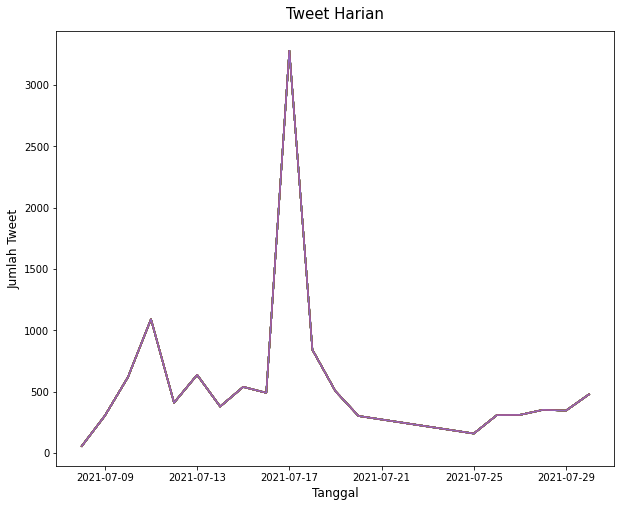

1410600280106835983 2021-07-01 14:04:49 +0000 <feny_faridah> @aladinonthewayy Klo nonton di tv mski dinaikin volumenya ttp ga denger😭suka pelan bgt al andin klo ngomong. Mosok headset aq colokin ke tv😭 @MNC_Pictures @OfficialRCTI  #IkatanCintaEp339
1410599833358897152 2021-07-01 14:03:02 +0000 <CRYINGOVERJSUH> @nctzenbase AKU TIDAK OQE, CUMA RCTI YANG OQE, AKU TIDAK OKE MENGLIHAT KETEK DAN JIDAT RENJUN, MULUS SEMUA KEK DIAMPLAS  https://t.co/0lpCWOeFC6
1410596141113040905 2021-07-01 13:48:22 +0000 <P5HJIFILES> @watrmelnsouj punya pc bc rcti indosiar ga kak?
1410595880583909379 2021-07-01 13:47:20 +0000 <reeeezki> Tiba-tiba pingin nonton film vampir cina yang dulu suka tayang di rcti tiap hari jumat.
1410593497132847111 2021-07-01 13:37:51 +0000 <PanggilAbangg> @hilopyuu RCTI OK
1410592931723894789 2021-07-01 13:35:37 +0000 <choco_sunmil> @woodyjuyeon Ya slogannya rcti kan oke 👍🏻👍🏻
1410592682636845058 2021-07-01 13:34:37 +0000 <aldinoisnen> Rame ya kos sebelah,pada ketawa ketiwi. Apa mr

In [ ]:
day = data.groupby('date').count()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.plot(day.index, day.values)

ax.set_title("Tweet Harian", fontdict={'fontsize': '15'}, pad = 12)

ax.set_xlabel("Tanggal", fontdict={'fontsize': '12'})
ax.set_ylabel("Jumlah Tweet", fontdict={'fontsize': '12'})

plt.show()

In [ ]:
data[['username', 'tweet']]

username                                              tweet
0           nanasadiqa  Suka Nonton Sinetron " Ayah Mengapa Aku Berbed...
1      mapaybandungcom  Jadwal Acara TV RCTI Hari Ini Rabu 21 Juli 202...
2          jaehyunbaii     Cuma direspon pake (❤️) kau kira aku rcti kah?
3             ohmynow1                          @rebecamrtnzz Kuproy rcti
4       portaljogjacom  Sinetron Ikatan Cinta dan Amanah Wali Malam In...
...                ...                                                ...
11405       niaaroffid  @hitikaaaa Mjb di rcti+ ada episode dari awal ...
11406    poppersjaksel  Thank u bro 1 pcs orderan poppers rush ultra s...
11407      justyoubaee  SAMPE ADA PEREBUTAN REYNA DAN PIHAK KUYANG PAL...
11408        aldepanik  Huru hara perebutan reyna pun akan dimulai. Ap...
11409    beneranakunih  @PritaPDW @tvindonesiawkwk Balasan dr rcti sih...

[11410 rows x 2 columns]

In [ ]:
data.to_excel("/content/twitterrcti+beforepreprocessing.xlsx")

ValueError: ignored

In [ ]:
data['username'].value_counts()

officialrcti     696
rctiplus         191
jkt48fullnews     79
mncnewsroom       76
mncupdate         76
                ... 
rvsmeown           1
aqang_gopud        1
leezeuskim         1
jjwichiie          1
yosesantonius      1
Name: username, Length: 6854, dtype: int64

In [ ]:
data

In [ ]:
Not_From_User_List = ["officialrcti" , "rctiplus" ]

def get_from_user_or_not( tweets_username ):

    if tweets_username in Not_From_User_List :
        return "False"
    else :
        return "True"

data["from_user_or_not"] =data["username"].apply( lambda row : get_from_user_or_not( row ) )

rcti_twitter_data_from_user = data[ data["from_user_or_not"] == "True" ]

rcti_twitter_data_from_user.head()

id      conversation_id  ... trans_dest from_user_or_not
0  1417630084106653696  1417630084106653696  ...                        True
1  1417622718187327488  1417622718187327488  ...                        True
2  1417618919766958084  1417618919766958080  ...                        True
3  1417612487587864576  1417612197664935936  ...                        True
4  1417609277083045892  1417609277083045888  ...                        True

[5 rows x 37 columns]

In [ ]:
import pandas as pd 
import numpy as np

TWEET_DATA = pd.read_csv("/content/test.csv", encoding = "ISO-8859-1")
TWEET_DATA['tweet'].str.encode('ascii', 'ignore')
TWEET_DATA.head()

id      conversation_id  ... trans_src trans_dest
0  1412779536534499328  1412779536534499328  ...       NaN        NaN
1  1412778890372681732  1412778890372681732  ...       NaN        NaN
2  1412777937506488320  1412777937506488320  ...       NaN        NaN
3  1412777497414885378  1412759244043030531  ...       NaN        NaN
4  1412776963421327361  1412776963421327361  ...       NaN        NaN

[5 rows x 36 columns]

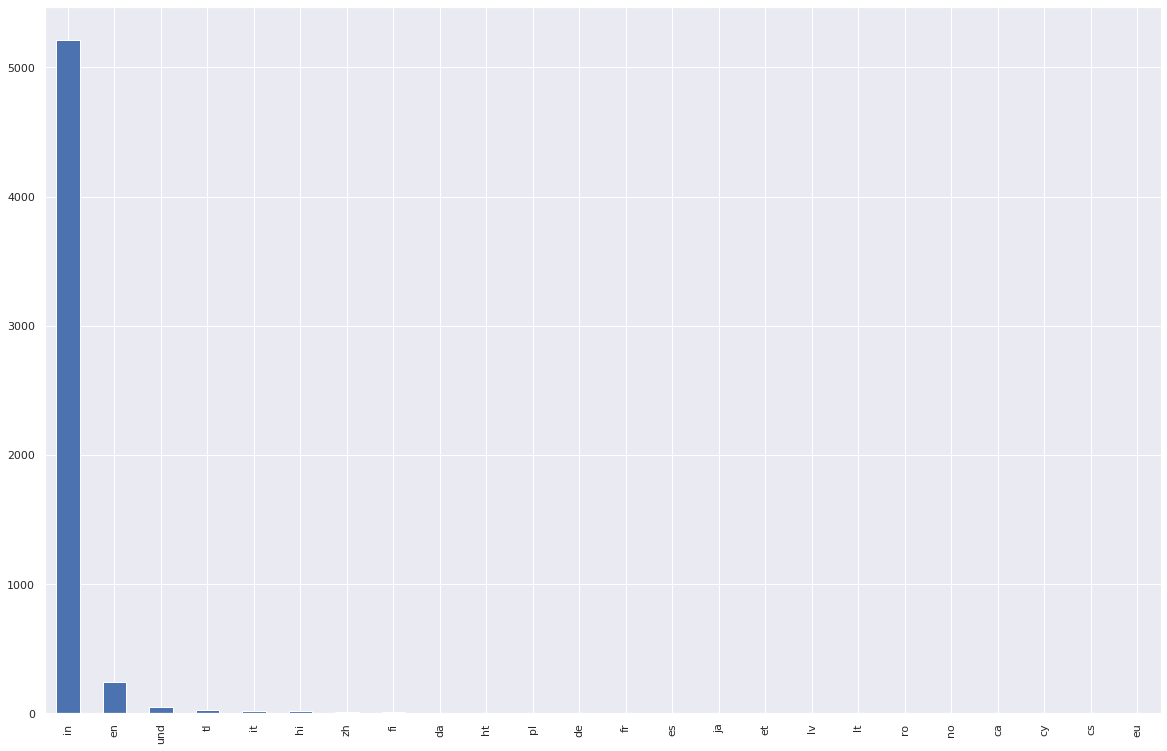

In [ ]:
#Lihat Distribusi Bahasa Twieets Dataset Tweets
import seaborn as sns
sns.set_theme()

TWEET_DATA["language"].value_counts().plot( kind = "bar" , figsize = ( 20 , 13 ))

In [ ]:
print("Dataset Tweets Tweets dari Tanggal {} sampai Tanggal {}".format( TWEET_DATA["date"].min() , TWEET_DATA["date"].max() ))
print("Dataset Tweets Tweets User dari {} User".format( len( TWEET_DATA["user_id"].unique() ) ))

Dataset Tweets Tweets dari Tanggal 2021-06-29 sampai Tanggal 2021-07-07
Dataset Tweets Tweets User dari 3034 User


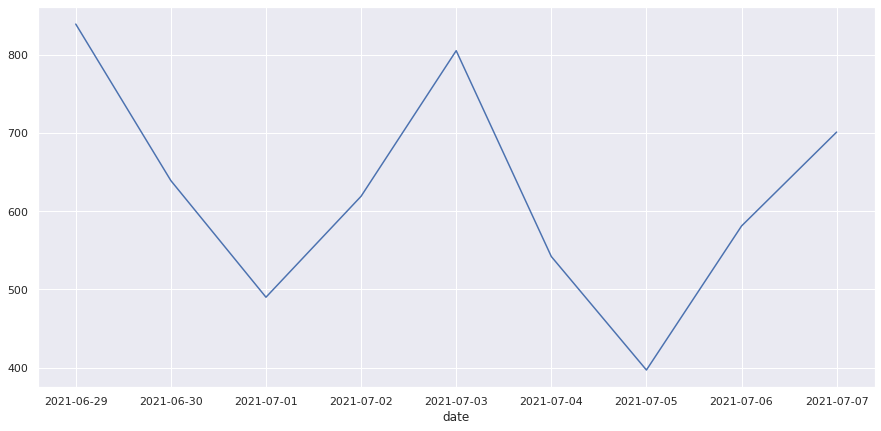

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#plot data
fig, ax = plt.subplots(figsize=(15,7))
TWEET_DATA.groupby(['date']).count()['id'].plot(ax=ax)

In [ ]:
TWEET_DATA.groupby(['date']).count()['id']

date
2021-06-29    839
2021-06-30    639
2021-07-01    490
2021-07-02    619
2021-07-03    805
2021-07-04    542
2021-07-05    397
2021-07-06    581
2021-07-07    701
Name: id, dtype: int64

## Preprocessing

In [ ]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
TWEET_DATA['tweet'] = TWEET_DATA['tweet'].str.lower()


print('Case Folding Result : \n')
print(TWEET_DATA['tweet'].head(5))
print('\n\n\n')

Case Folding Result : 

0    proses hukumny msih belum direvisi yaaa  @laya...
1    tv hari ini setel rcti aja. di timer 90 menit....
2                eh beneran rcti mau tayangin film bl?
3                 @94ifjun di rcti+ aja kak ayo nonton
4    ini bola yang ditunggu" sama abah ni ðð¤­....
Name: tweet, dtype: object






In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = TWEET_DATA['tweet'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(TWEET_DATA['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0    [proses, hukumny, msih, belum, direvisi, yaaa,...
1    [tv, hari, ini, setel, rcti, aja, di, timer, m...
2         [eh, beneran, rcti, mau, tayangin, film, bl]
3                    [di, rcti, aja, kak, ayo, nonton]
4    [ini, bola, yang, ditunggu, sama, abah, ni, eh...
Name: tweet_tokens, dtype: object






In [ ]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

TWEET_DATA['tweet_tokens_fdist'] = TWEET_DATA['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(TWEET_DATA['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(proses, 1), (hukumny, 1), (msih, 1), (belum,...
1    [(berita, 2), (tv, 1), (hari, 1), (ini, 1), (s...
2    [(eh, 1), (beneran, 1), (rcti, 1), (mau, 1), (...
3    [(di, 1), (rcti, 1), (aja, 1), (kak, 1), (ayo,...
4    [(ini, 1), (bola, 1), (yang, 1), (ditunggu, 1)...
Name: tweet_tokens_fdist, dtype: object


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])
len(list_stopwords)
# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("./stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
len(list_stopwords)
# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal) 


print(TWEET_DATA['tweet_tokens_WSW'].head())

758
0              [proses, hukumny, msih, direvisi, rcti]
1    [tv, setel, rcti, timer, menit, chanel, berita...
2                  [beneran, rcti, tayangin, film, bl]
3                                          [rcti, ayo]
4                 [bola, ditunggu, abah, taunya, rcti]
Name: tweet_tokens_WSW, dtype: object


In [ ]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

tweet_normalized = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)

tweet_normalized.head(10)

0            [proses, hukumnya, masih, direvisi, rcti]
1    [tv, setel, rcti, timer, menit, channel, berit...
2                  [beneran, rcti, tayangin, film, bl]
3                                          [rcti, ayo]
4                 [bola, ditunggu, abah, taunya, rcti]
5    [link, live, streaming, inggris, denmark, semi...
6                                         [link, klik]
7                                   [iya, kalah, rcti]
8                     [sinetron, rajawali, ayo, ngaku]
9    [city, euro, today, euro, semifinal, inggris, ...
Name: tweet_tokens_WSW, dtype: object

In [ ]:
pip install xlrd

In [ ]:
pip install openpyxl

In [ ]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 5.4 MB/s 


In [ ]:
!pip install swifter

     |████████████████████████████████| 296 kB 5.4 MB/s 
     |████████████████████████████████| 118 kB 48.9 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweet_normalized:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = tweet_normalized.swifter.apply(get_stemmed_term)
print(TWEET_DATA['tweet_tokens_stemmed'])

Streaming output truncated to the last 5000 lines.
simpan : simpan
mimpihalu : mimpihalu
sabar : sabar
jantungan : jantung
kudugong : kudugong
rajanya : raja
mimpinya : mimpi
elsaiton : elsaiton
auk : auk
delapan : delapan
kesini : kesini
penikmat : nikmat
fav : fav
kalangan : kalang
zon : zon
ampunnn : ampunnn
literely : literely
hoki : hoki
bertubikemaren : bertubikemaren
sep : sep
arnoldkemaren : arnoldkemaren
mcisekarang : mcisekarang
elsanya : elsanya
kesukaan : suka
cars : cars
toy : toy
finding : finding
nemo : nemo
gakminat : gakminat
bosenin : bosenin
skrggggggggg : skrggggggggg
lagii : lagi
kaa : kaa
yaudah : yaudah
bgsd : bgsd
gaya : gaya
sdah : sdah
tontonuntung : tontonuntung
independenrcti : independenrcti
cintaxdan : cintaxdan
beritax : beritax
bagussmoga : bagussmoga
kembang : kembang
padjajaran : padjajaran
bgs : bgs
culik : culik
lifebook : lifebook
sodikin : sodikin
bicaranya : bicara
febs : febs
brok : brok
murahan : murah
gausa : gausa
berhatihati : berhatihati
kan


0                    [proses, hukum, masih, revisi, rcti]
1       [tv, setel, rcti, timer, menit, channel, berit...
2                     [beneran, rcti, tayangin, film, bl]
3                                             [rcti, ayo]
4                         [bola, tunggu, abah, tau, rcti]
                              ...                        
5608    [wahyono, jam, medsos, tebar, memang, suka, be...
5609    [sinopsis, ikat, cinta, selasa, juni, ada, ric...
5610    [video, jakarta, gomen, summer, mega, konser, ...
5611                                         [live, rcti]
5612    [jadwal, laga, piala, eropa, malam, swedia, uk...
Name: tweet_tokens_stemmed, Length: 5613, dtype: object


In [ ]:
import re, string, unicodedata  #modul regular expression 
import nltk
from nltk import word_tokenize, sent_tokenize  #Paket ini membagi teks input menjadi kata-kata.,                                  
from nltk.corpus import stopwords

In [ ]:
#preprocessing
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))
New_word_stop_list = ['kak' , 'admin' , 'useetvgo' , 'go' , 'tv' , 'u' , 'see' , 
'yg', 'ya', 'dg', 'dgn', 'nich', 'nih', 'sih', 'si', 'nya', 
              	'lg', 'dulu', 'jgn', 'kl', 'klu', 'klo', 'kalo', 'nge',
                   	'sip', 'spt', 'hallo', 'halo', 'ny', 'd', 'biar', 'skrg',
                   	'bikin', 'bilang', 'tau', 'utk', 'jd', 'yah', 'loh', 'lho', 'aj', 'aja',
                   	'cm', 'banget', 'deh', 'dimana', 'for', 'i', 'coba', 'it', 'sy', 'lumayan',
                   	'kasih', 'tingkat', 'apk', 'usee', 'useetv', 'channel'
                     "min" , "winda" , "youtube" , "spotify" , "dana","nonton", "mola", "tidak", "saya", "kenapa", "wib", "dah", "oke", "rcti", "gaada",
                     "tidak_ada",'tdk','gak','enggak','ga',"yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah']

# read txt stopword using pandas
txt_stopword = pd.read_csv("/content/stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
New_word_stop_list.extend(txt_stopword["stopwords"][0].split(' '))
len(New_word_stop_list)
# ---------------------------------------------------------------------------------------

# convert list to dictionary
New_word_stop_list = set(New_word_stop_list)
def removeStopword(str):
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words and w not in New_word_stop_list ]
    return ' '.join(filtered_sentence)
#remove sentence which contains only one word
def removeSentence(str): 
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''
    
    return str
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
       
    return str
def preprocessing( tweet):

    tweet = str( tweet )
    tweet = removeSentence( tweet )
    tweet = cleaning( tweet )
    tweet  = removeStopword( tweet )

    #print( str )
    
    return tweet

758


In [ ]:
# Preprocessing Data

TWEET_DATA["preprocessed_tweets_text"] = TWEET_DATA["tweet"].apply( lambda row : preprocessing( row ) )

TWEET_DATA.head()

id  ...                           preprocessed_tweets_text
0  1412779536534499328  ...                       proses hukumny msih direvisi
1  1412778890372681732  ...  setel timer menit chanel berita berita meningg...
2  1412777937506488320  ...                           beneran tayangin film bl
3  1412777497414885378  ...                                                ayo
4  1412776963421327361  ...                          bola ditunggu abah taunya

[5 rows x 41 columns]

In [ ]:
# Normalisasi Data

normalized_word = pd.read_excel("/content/normalisasi.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

def normalized_tweets( tweets_text ):

    tweets_words_list = tweets_text.split( " " )

    normalized_tweets_text = ""

    for word in tweets_words_list :

        if word in normalized_word_dict :
          normalized_tweets_text = normalized_tweets_text + " " + normalized_word_dict[ word ]
        else :
          normalized_tweets_text = normalized_tweets_text + " " + word
    
    return normalized_tweets_text


TWEET_DATA["normalized_and_preprocessed_tweets_text"] = TWEET_DATA["preprocessed_tweets_text"].apply( lambda row : normalized_tweets( row ) )

TWEET_DATA


id  ...            normalized_and_preprocessed_tweets_text
0     1412779536534499328  ...                     proses hukumnya masih direvisi
1     1412778890372681732  ...   setel timer menit channel berita berita menin...
2     1412777937506488320  ...                           beneran tayangin film bl
3     1412777497414885378  ...                                                ayo
4     1412776963421327361  ...                          bola ditunggu abah taunya
...                   ...  ...                                                ...
5608  1409648606693396491  ...   wahyono dijaman medsos bertebaran memang suka...
5609  1409647573279805440  ...   sinopsis ikatan cinta selasa juni keberadaan ...
5610  1409647336087719939  ...   video jakarta gomen summer mega konser jakart...
5611  1409647335747985412  ...                                               live
5612  1409647317712396291  ...   jadwal laga piala eropa malam swedia ukraina ...

[5613 rows x 42 columns]

In [ ]:
TWEET_DATA.to_csv( "/content/Normalized_And_Preprocess_Tweets_Text.csv" )

In [ ]:
rcti_twitter_data = pd.read_csv( "/content/Normalized_And_Preprocess_Tweets_Text.csv")

rcti_twitter_data.head()

Unnamed: 0  ...            normalized_and_preprocessed_tweets_text
0           0  ...                     proses hukumnya masih direvisi
1           1  ...   setel timer menit channel berita berita menin...
2           2  ...                           beneran tayangin film bl
3           3  ...                                                ayo
4           4  ...                          bola ditunggu abah taunya

[5 rows x 43 columns]

# Tweet From User



In [ ]:
rcti_twitter_data["username"].value_counts()

officialrcti      392
rctiplus          382
andinclub         213
andinrcti         120
sunwonx            89
                 ... 
lyalll_             1
dimasabank          1
muhagungd           1
ridwantebellum      1
biancallysta_       1
Name: username, Length: 3034, dtype: int64

In [ ]:
Not_From_User_List = ["officialrcti" , "rctiplus","rcti" ]

def get_from_user_or_not( tweets_username ):

    if tweets_username in Not_From_User_List :
        return "False"
    else :
        return "True"

rcti_twitter_data["from_user_or_not"] = rcti_twitter_data["username"].apply( lambda row : get_from_user_or_not( row ) )

rcti_twitter_data_from_user = rcti_twitter_data[ rcti_twitter_data["from_user_or_not"] == "True" ]

rcti_twitter_data_from_user.head()

Unnamed: 0  ...  from_user_or_not
0           0  ...              True
1           1  ...              True
2           2  ...              True
3           3  ...              True
4           4  ...              True

[5 rows x 44 columns]

In [ ]:
print("Dataset Tweets Tweets dari Tanggal {} sampai Tanggal {}".format( rcti_twitter_data_from_user["date"].min() , rcti_twitter_data_from_user["date"].max() ))
print("Dataset Tweets Tweets User dari {} User".format( len( rcti_twitter_data_from_user["user_id"].unique() ) ))

Dataset Tweets Tweets dari Tanggal 2021-06-29 sampai Tanggal 2021-07-07
Dataset Tweets Tweets User dari 3032 User


In [ ]:
rcti_twitter_data_from_user.set_index('date', inplace=False)
rcti_twitter_data_from_user.head()

Unnamed: 0  ...  from_user_or_not
0           0  ...              True
1           1  ...              True
2           2  ...              True
3           3  ...              True
4           4  ...              True

[5 rows x 44 columns]

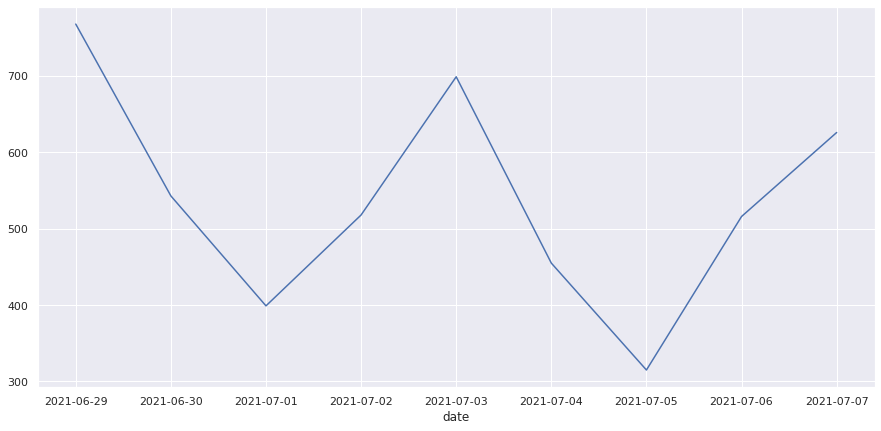

In [ ]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
rcti_twitter_data_from_user.groupby(['date']).count()['id'].plot(ax=ax)

In [ ]:
rcti_twitter_data_from_user.groupby(['date']).count()['id']

date
2021-06-29    768
2021-06-30    543
2021-07-01    399
2021-07-02    518
2021-07-03    699
2021-07-04    455
2021-07-05    315
2021-07-06    516
2021-07-07    626
Name: id, dtype: int64

In [ ]:
text = rcti_twitter_data_from_user['normalized_and_preprocessed_tweets_text']

text_list =  [i.split() for i in text]

print( len(text_list ) )

4839


# Sentiment Analysis

In [ ]:
#for data wrangling and manipulation

import pandas as pd
import numpy as np

#for NLP text processing and formatting

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# For word lemmitization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# for word Stemming
from nltk.stem.porter import PorterStemmer

# for Machine Learning process

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# for Machine Learning model evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def get_feature_vector(train_fit):
    """
    Function to Convert a collection of raw documents to a matrix of TF-IDF features.
    TF-IDF - Term Frequency Inverse Documnet Frequency
    """
    
    vector = TfidfVectorizer(sublinear_tf=True)      # Defining the vector
    vector.fit(train_fit)                            # fitting the data into the vector
    return vector                                    # returning the vector as function call

In [ ]:
tf_vector = get_feature_vector(np.array(rcti_twitter_data_from_user['normalized_and_preprocessed_tweets_text']).ravel())

In [ ]:
raw_data = pd.read_csv('/content/train.csv')
raw_data_fix = raw_data[:4839]
raw_data_fix

id  ... label
0        0  ...     1
1        1  ...     1
2        2  ...     1
3        3  ...     1
4        4  ...     1
...    ...  ...   ...
4834  4834  ...     1
4835  4835  ...     0
4836  4836  ...     1
4837  4837  ...     1
4838  4838  ...     1

[4839 rows x 4 columns]

In [ ]:
X_t = tf_vector.transform(np.array(rcti_twitter_data_from_user["normalized_and_preprocessed_tweets_text"]).ravel())     # Predictor Variable

In [ ]:
X=X_t.toarray()

In [ ]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y = raw_data_fix["label"].values

In [ ]:
# SPlitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## Naive Bayes Algorithm

In [ ]:
# Using Naive Bayes Model :

NB_model = GaussianNB()

NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the values and the Accuracy Score

y_predict_nb = NB_model.predict(X_test)
print(y_predict_nb)

print("Accuracy Score for Naive Bayes Model is :: ", accuracy_score(y_test, y_predict_nb))

[1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1
 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0
 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0
 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 

In [ ]:
# Classification Report :

print("Classification_Report :: \n\n", classification_report(y_test, y_predict_nb))

Classification_Report :: 

               precision    recall  f1-score   support

           0       0.11      0.39      0.17       121
           1       0.86      0.55      0.67       847

    accuracy                           0.53       968
   macro avg       0.49      0.47      0.42       968
weighted avg       0.77      0.53      0.61       968



In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test = rcti_twitter_data_from_user[:4839]
test

Unnamed: 0  ...  from_user_or_not
0              0  ...              True
1              1  ...              True
2              2  ...              True
3              3  ...              True
4              4  ...              True
...          ...  ...               ...
5608        5608  ...              True
5609        5609  ...              True
5610        5610  ...              True
5611        5611  ...              True
5612        5612  ...              True

[4839 rows x 44 columns]

In [ ]:
# Creating text feature of test data :


test_feature = tf_vector.transform(np.array(test['normalized_and_preprocessed_tweets_text']).ravel())
Xtest=test_feature.toarray()

In [ ]:
# Using Naive Bayes Model for Prediction ::

test_prediction_nb = NB_model.predict(Xtest)

test_prediction_nb

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
submission_result_nb = pd.DataFrame({'tweet': test.normalized_and_preprocessed_tweets_text, 'sentiment':test_prediction_nb})
submission_result_nb

tweet  sentiment
0                        proses hukumnya masih direvisi          1
1      setel timer menit channel berita berita menin...          1
2                              beneran tayangin film bl          1
3                                                   ayo          0
4                             bola ditunggu abah taunya          1
...                                                 ...        ...
5608   wahyono dijaman medsos bertebaran memang suka...          1
5609   sinopsis ikatan cinta selasa juni keberadaan ...          0
5610   video jakarta gomen summer mega konser jakart...          1
5611                                               live          0
5612   jadwal laga piala eropa malam swedia ukraina ...          1

[4839 rows x 2 columns]

In [ ]:
# Total number os tweets grouped according sentiment

test_result = submission_result_nb['sentiment'].value_counts()
test_result

1    2865
0    1974
Name: sentiment, dtype: int64

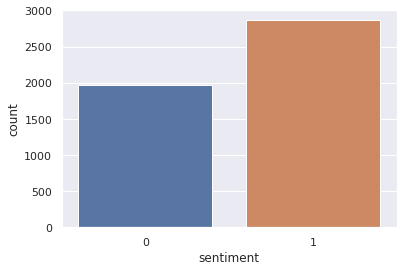

In [ ]:
import seaborn as sns
sns.countplot(submission_result_nb['sentiment'])

## Support Vector Machine Algorithm

In [ ]:
from sklearn import svm
svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Accuracy Score for Support Vector Machine Model is :: ", accuracy_score(y_test, y_pred_svm))

Accuracy Score for Support Vector Machine Model is ::  0.871900826446281


In [ ]:
# Classification Report :

print("Classification_Report :: \n\n", classification_report(y_test, y_pred_svm))

Classification_Report :: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.87      1.00      0.93       847

    accuracy                           0.87       968
   macro avg       0.44      0.50      0.47       968
weighted avg       0.77      0.87      0.82       968



In [ ]:
# Using Naive Bayes Model for Prediction ::

test_prediction_svm = svm.predict(Xtest)

test_prediction_svm

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
submission_result_svm = pd.DataFrame({'tweet': test.normalized_and_preprocessed_tweets_text, 'sentiment':test_prediction_svm})
submission_result_svm

tweet  sentiment
0                        proses hukumnya masih direvisi          1
1      setel timer menit channel berita berita menin...          1
2                              beneran tayangin film bl          1
3                                                   ayo          1
4                             bola ditunggu abah taunya          1
...                                                 ...        ...
5608   wahyono dijaman medsos bertebaran memang suka...          1
5609   sinopsis ikatan cinta selasa juni keberadaan ...          1
5610   video jakarta gomen summer mega konser jakart...          1
5611                                               live          1
5612   jadwal laga piala eropa malam swedia ukraina ...          1

[4839 rows x 2 columns]

In [ ]:
# Total number os tweets grouped according sentiment

test_result = submission_result_svm['sentiment'].value_counts()
test_result

1    4803
0      36
Name: sentiment, dtype: int64

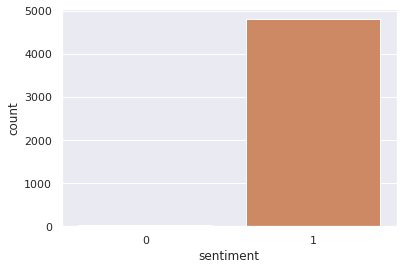

In [ ]:
import seaborn as sns
sns.countplot(submission_result_svm['sentiment'])

In [ ]:
submission_result_svm.to_csv("./Sentiment_svm.csv")

## K- Nearest Neighbour

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import accuracy_score 
 for k in [1,3,5,7,10]:

    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
    y_predict_knn = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

In [ ]:
print("Accuracy Score for K-Nearest Neighbour is :: ", accuracy_score(y_test, y_predict_knn))

Accuracy Score for K-Nearest Neighbour is ::  0.8760330578512396


In [ ]:
# Classification Report :

print("Classification_Report :: \n\n", classification_report(y_test, y_predict_knn))

Classification_Report :: 

               precision    recall  f1-score   support

           0       1.00      0.01      0.02       121
           1       0.88      1.00      0.93       847

    accuracy                           0.88       968
   macro avg       0.94      0.50      0.48       968
weighted avg       0.89      0.88      0.82       968



In [ ]:
# Using KNN Model for Prediction ::

test_prediction_knn = classifier.predict(Xtest)

test_prediction_knn

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
submission_result_knn = pd.DataFrame({'tweet': test.normalized_and_preprocessed_tweets_text, 'sentiment':test_prediction_knn})
submission_result_knn

tweet  sentiment
0                        proses hukumnya masih direvisi          1
1      setel timer menit channel berita berita menin...          1
2                              beneran tayangin film bl          1
3                                                   ayo          1
4                             bola ditunggu abah taunya          1
...                                                 ...        ...
5608   wahyono dijaman medsos bertebaran memang suka...          1
5609   sinopsis ikatan cinta selasa juni keberadaan ...          1
5610   video jakarta gomen summer mega konser jakart...          1
5611                                               live          1
5612   jadwal laga piala eropa malam swedia ukraina ...          1

[4839 rows x 2 columns]

In [ ]:
submission_result_knn.to_csv("/content/Sentiment_KNN.csv")

In [ ]:
# Total number os tweets grouped according sentiment

test_result = submission_result_knn['sentiment'].value_counts()
test_result

1    4827
0      12
Name: sentiment, dtype: int64

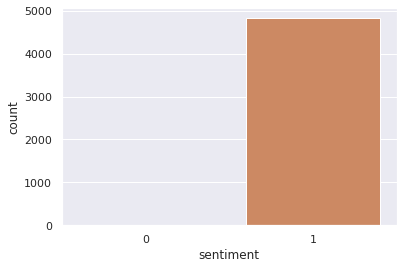

In [ ]:
import seaborn as sns
sns.countplot(submission_result_knn['sentiment'])

# Topic Modeling Tweet Text From User

In [ ]:
text = rcti_twitter_data_from_user['normalized_and_preprocessed_tweets_text']

text_list =  [i.split() for i in text]

print( len(text_list ) )

4839


In [ ]:
pip install gensim

In [ ]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(1139 unique tokens: ['berita', 'channel', 'meninggal', 'menit', 'setel']...)


In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

4839
[(121, 1), (129, 1), (184, 1), (185, 1), (186, 1), (187, 1), (188, 1), (189, 1), (190, 1), (191, 1), (192, 1), (193, 1), (194, 1), (195, 1), (196, 1), (197, 1), (198, 1), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (208, 2)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=500)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

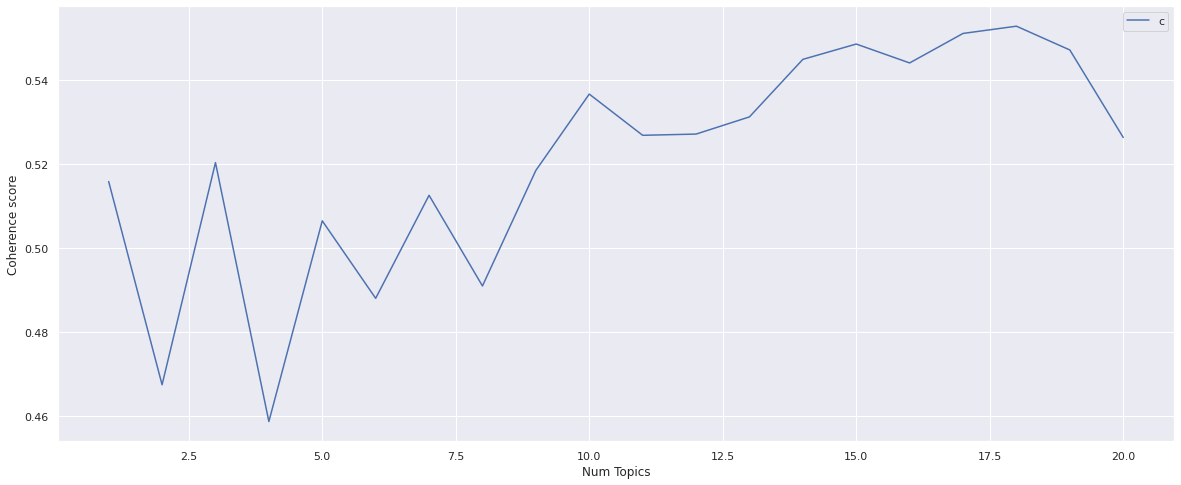

In [ ]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus = corpus_tfidf, 
                                                        texts = text_list, start= start, limit= limit, step= step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.515788
Num Topics = 2  has Coherence Value of 0.467438
Num Topics = 3  has Coherence Value of 0.520299
Num Topics = 4  has Coherence Value of 0.458687
Num Topics = 5  has Coherence Value of 0.506444
Num Topics = 6  has Coherence Value of 0.488007
Num Topics = 7  has Coherence Value of 0.512524
Num Topics = 8  has Coherence Value of 0.490949
Num Topics = 9  has Coherence Value of 0.518441
Num Topics = 10  has Coherence Value of 0.536607
Num Topics = 11  has Coherence Value of 0.526799
Num Topics = 12  has Coherence Value of 0.527089
Num Topics = 13  has Coherence Value of 0.531181
Num Topics = 14  has Coherence Value of 0.544868
Num Topics = 15  has Coherence Value of 0.548516
Num Topics = 16  has Coherence Value of 0.544017
Num Topics = 17  has Coherence Value of 0.551039
Num Topics = 18  has Coherence Value of 0.552764
Num Topics = 19  has Coherence Value of 0.547104
Num Topics = 20  has Coherence Value of 0.52629


In [ ]:
# Create the pandas DataFrame
df = pd.DataFrame(columns = ['topic', 'coherence_value'])
for m, cv in zip(x, coherence_values):
    new_row = {'topic': m, 'coherence_value':round(cv, 6)}
    df = df.append(new_row, ignore_index=True)

df.sort_values(by='coherence_value', ascending=False).reset_index().drop(columns='index')

topic  coherence_value
0    18.0         0.552764
1    17.0         0.551039
2    15.0         0.548516
3    19.0         0.547104
4    14.0         0.544868
5    16.0         0.544017
6    10.0         0.536607
7    13.0         0.531181
8    12.0         0.527089
9    11.0         0.526799
10   20.0         0.526290
11    3.0         0.520299
12    9.0         0.518441
13    1.0         0.515788
14    7.0         0.512524
15    5.0         0.506444
16    8.0         0.490949
17    6.0         0.488007
18    2.0         0.467438
19    4.0         0.458687

In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics= 2 , iterations = 500) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic)) 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 Word: 0.018*"live" + 0.017*"ikatan_cinta" + 0.013*"inggris_jerman" + 0.011*"nyiarin" + 0.010*"tidak" + 0.010*"menonton_ikatan" + 0.009*"tayang" + 0.009*"live_streaming" + 0.008*"euro" + 0.008*"cinta"

Topic: 1 Word: 0.033*"inggris_jerman" + 0.019*"jerman" + 0.015*"jerman_inggris" + 0.015*"inggris" + 0.014*"ditayangin" + 0.013*"sinetron" + 0.012*"disiarin" + 0.011*"big_match" + 0.010*"anjing" + 0.009*"nayangin"



In [ ]:
import pandas as pd

top_words_per_topic = []

for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])

#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])

print(df)

    Topic             Word         P
0       0             live  0.018191
1       0     ikatan_cinta  0.016747
2       0   inggris_jerman  0.013177
3       0          nyiarin  0.010695
4       0            tidak  0.010061
5       0  menonton_ikatan  0.009844
6       0           tayang  0.009010
7       0   live_streaming  0.008507
8       0             euro  0.008423
9       0            cinta  0.008174
10      1   inggris_jerman  0.032998
11      1           jerman  0.019420
12      1   jerman_inggris  0.015266
13      1          inggris  0.014786
14      1       ditayangin  0.014130
15      1         sinetron  0.013083
16      1         disiarin  0.012210
17      1        big_match  0.011118
18      1           anjing  0.010049
19      1         nayangin  0.008960


In [ ]:
pip install pyLDAvis==2.1.2

In [ ]:
!pip install --upgrade pandas==1.2

In [ ]:
import gensim
import pyLDAvis.gensim ; pyLDAvis.enable_notebook()


data = pyLDAvis.gensim.prepare( model, corpus_tfidf, dictionary )

print(data)

pyLDAvis.save_html(data, 'Topic Modelling Visualization From User_RCTI.html')

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.070433  0.0       1        1  50.849706
1     -0.070433  0.0       2        1  49.150294, topic_info=                 Term        Freq       Total Category  logprob  loglift
40       ikatan_cinta   76.000000   76.000000  Default  30.0000  30.0000
411        ditayangin   61.000000   61.000000  Default  29.0000  29.0000
1084   jerman_inggris   71.000000   71.000000  Default  28.0000  28.0000
1083   inggris_jerman  187.000000  187.000000  Default  27.0000  27.0000
102   menonton_ikatan   44.000000   44.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
58             tayang   26.691336   64.149600   Topic2  -5.0143  -0.1666
253          saksikan   19.656596   33.786619   Topic2  -5.3203   0.1686
16               live   27.097219  102.727275   Topic2  -4.9992  -0.6224
974               big   15.3692

In [ ]:
# Predict Topic in Tweets Text


topics_tweets_text_dict = {}


for idx, topic in model.print_topics(-1 ):
    topics_tweets_text_dict[ topic.split("*")[1].split(" ")[0]] = idx
    #print('Topic: {} Word: {}\n'.format(idx, topic)) 

print( topics_tweets_text_dict )





def getTopicForQuery ( tweet_text ):


    ques_vec = []
    ques_vec = dictionary.doc2bow(  tweet_text )

    topic_vec = []
    topic_vec = model[ques_vec]

    word_count_array = np.empty((len(topic_vec), 2), dtype = np.object)
    for i in range(len(topic_vec)):
        word_count_array[i, 0] = topic_vec[i][0]
        word_count_array[i, 1] = topic_vec[i][1]

    idx = np.argsort(word_count_array[:, 1])
    idx = idx[::-1]
    word_count_array = word_count_array[idx]

    final = []
    final = model.print_topic(word_count_array[0, 0], 1)

    question_topic = final.split('*') ## as format is like "probability * topic"

    return topics_tweets_text_dict[ question_topic[1] ] #final#question_topic #topics_tweets_text_dict[ question_topic[1] ] #question_topic[1]

for i in range(10):
  print("Tweets Text ke- {} {} Topik {}".format( i + 1 , text_list[i] , getTopicForQuery( text_list[i]) ) )

#getTopicForQuery( text_list[0] ) #"min login apps browser gak mohon bantuannya" )


{'"live"': 0, '"inggris_jerman"': 1}
Tweets Text ke- 1 ['proses', 'hukumnya', 'masih', 'direvisi'] Topik 1
Tweets Text ke- 2 ['setel', 'timer', 'menit', 'channel', 'berita', 'berita', 'meninggal', 'raiso', 'turu'] Topik 0
Tweets Text ke- 3 ['beneran', 'tayangin', 'film', 'bl'] Topik 0
Tweets Text ke- 4 ['ayo'] Topik 0
Tweets Text ke- 5 ['bola', 'ditunggu', 'abah', 'taunya'] Topik 0
Tweets Text ke- 6 ['link', 'live', 'streaming', 'inggris', 'denmark', 'semifinal', 'euro', 'live_streaming', 'inggris_denmark', 'semifinal_euro', 'live_streaming', 'inggris_denmark', 'semifinal_euro', 'live_streaming', 'inggris_denmark', 'semifinal_euro'] Topik 0
Tweets Text ke- 7 ['link', 'klik'] Topik 0
Tweets Text ke- 8 ['iya', 'kalah'] Topik 1
Tweets Text ke- 9 ['sinetron', 'rajawali', 'ayo', 'ngaku', 'ayo_ngaku', 'ayo_ngaku', 'ayo_ngaku'] Topik 0
Tweets Text ke- 10 ['city', 'euro', 'today', 'euro', 'semifinal', 'inggris', 'denmark', 'kamis', 'juli', 'kick', 'off', 'wembley', 'stadium', 'london', 'inggri

In [ ]:
topics_tweets_text_list = []

for tweet_texts in text_list :

  topics_tweets_texts = getTopicForQuery( tweet_texts )

  topics_tweets_text_list.append( topics_tweets_texts ) #text_list.append( topics_tweets_texts ) #topics_tweets_text_list.append( topics_tweets_texts ) #text_list.append( topics_tweets_texts )

rcti_twitter_data_from_user["Tweets Text Topic Predicted"] = topics_tweets_text_list

rcti_twitter_data_from_user.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Unnamed: 0  ...  Tweets Text Topic Predicted
0           0  ...                            1
1           1  ...                            0
2           2  ...                            0
3           3  ...                            0
4           4  ...                            0

[5 rows x 45 columns]

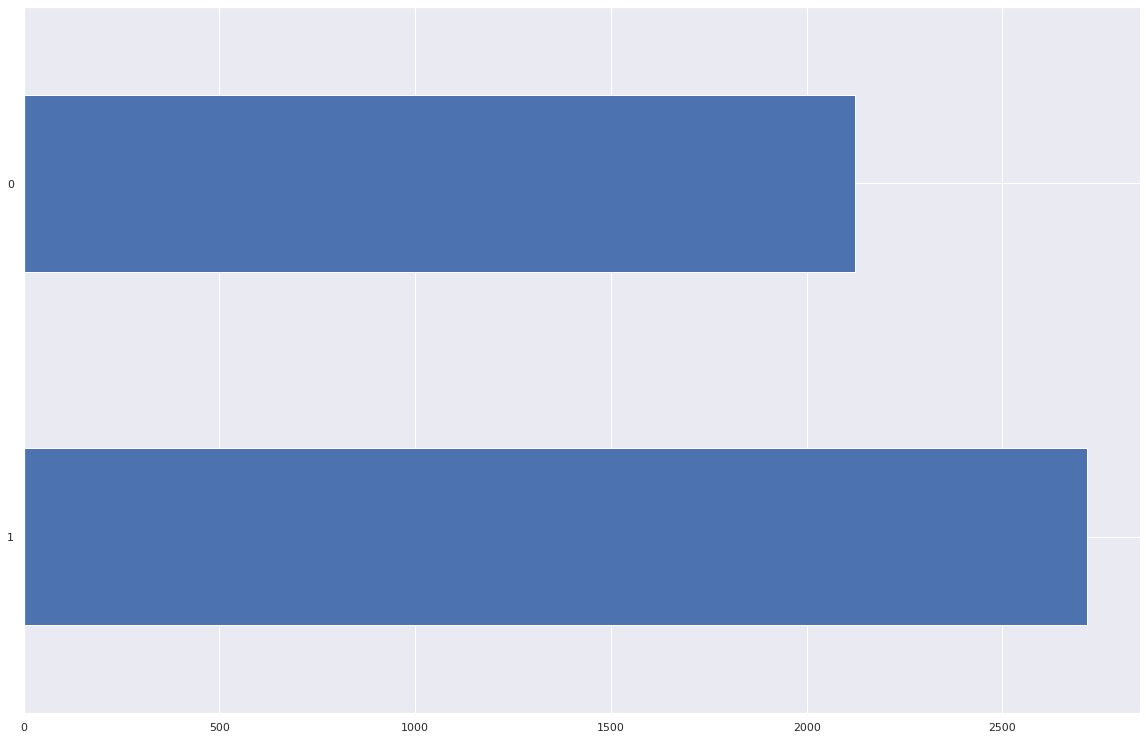

In [ ]:
# Plot Topics Predicted in RCTI Tweets Texts

rcti_twitter_data_from_user["Tweets Text Topic Predicted"].value_counts().plot( kind = "barh" , figsize = ( 20 , 13 ))

In [ ]:
pip install wordcloud

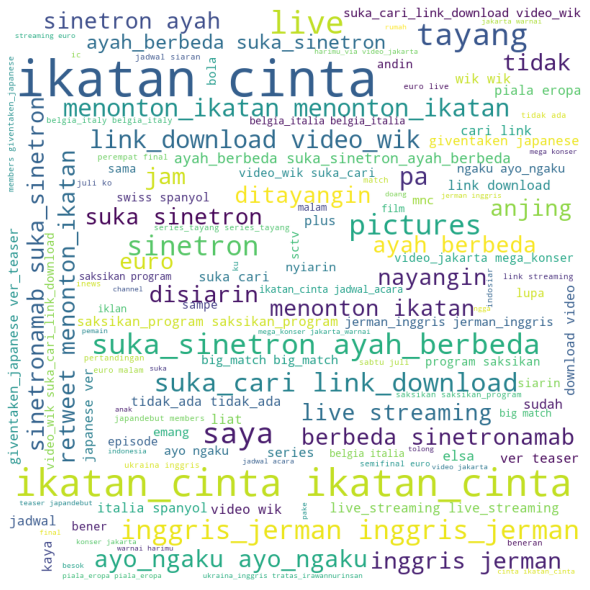

In [ ]:
text_list_join_all_words = ""

for tweet_text in text_list :
  
    for word in tweet_text :

        text_list_join_all_words = text_list_join_all_words + " " + word

# importing all necessery modules
from wordcloud import WordCloud #, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate( text_list_join_all_words )
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
text_list

[['proses', 'hukumnya', 'masih', 'direvisi'],
 ['setel',
  'timer',
  'menit',
  'channel',
  'berita',
  'berita',
  'meninggal',
  'raiso',
  'turu'],
 ['beneran', 'tayangin', 'film', 'bl'],
 ['ayo'],
 ['bola', 'ditunggu', 'abah', 'taunya'],
 ['link',
  'live',
  'streaming',
  'inggris',
  'denmark',
  'semifinal',
  'euro',
  'live_streaming',
  'inggris_denmark',
  'semifinal_euro',
  'live_streaming',
  'inggris_denmark',
  'semifinal_euro',
  'live_streaming',
  'inggris_denmark',
  'semifinal_euro'],
 ['link', 'klik'],
 ['iya', 'kalah'],
 ['sinetron',
  'rajawali',
  'ayo',
  'ngaku',
  'ayo_ngaku',
  'ayo_ngaku',
  'ayo_ngaku'],
 ['city',
  'euro',
  'today',
  'euro',
  'semifinal',
  'inggris',
  'denmark',
  'kamis',
  'juli',
  'kick',
  'off',
  'wembley',
  'stadium',
  'london',
  'inggris',
  'live',
  'inggris_denmark',
  'kamis_juli',
  'kick_off',
  'inggris_denmark',
  'kamis_juli',
  'kick_off',
  'wembley_stadium',
  'inggris_denmark',
  'kamis_juli',
  'kick_off

In [ ]:
pip install pyLDAvis==2.1.2

In [ ]:
!pip install --upgrade pandas==1.2

In [ ]:
import gensim
import pyLDAvis.gensim ; pyLDAvis.enable_notebook()

panel = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.display(panel)

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([ int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    time = rcti_twitter_data['date']
    contents  = contents.reset_index(drop=True)
    time = time.reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, contents, time], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(model, corpus_tfidf, text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Date']
print(df_dominant_topic.shape)
df_dominant_topic.head()

(5613, 6)


Document_No  ...        Date
0            0  ...  2021-07-07
1            1  ...  2021-07-07
2            2  ...  2021-07-07
3            3  ...  2021-07-07
4            4  ...  2021-07-07

[5 rows x 6 columns]

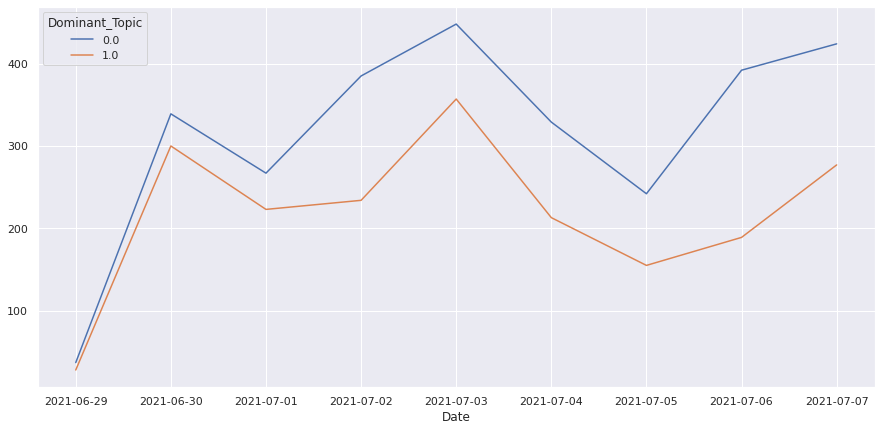

In [ ]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_dominant_topic.groupby(['Date', 'Dominant_Topic']).count()['Text'].unstack().plot(ax=ax)

In [ ]:
frequency_dominant_topic = df_dominant_topic['Dominant_Topic'].value_counts().reset_index()
frequency_dominant_topic['%Frequency'] = (frequency_dominant_topic['Dominant_Topic'] / frequency_dominant_topic['Dominant_Topic'].sum())*100
frequency_dominant_topic.columns = ['Dominant_Topic','Frequency','%Frequency']
frequency_dominant_topic.sort_values('Dominant_Topic', ascending=True)

Dominant_Topic  Frequency  %Frequency
0             0.0       2863   59.165117
1             1.0       1976   40.834883

In [ ]:
df_topic0 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 0.0]['Date'].value_counts().sort_index()).reset_index()
df_topic0.columns = ['date', 'freq']
df_topic0['topic'] = 'Topic 0'
df_topic0

date  freq    topic
0  2021-06-29    37  Topic 0
1  2021-06-30   339  Topic 0
2  2021-07-01   267  Topic 0
3  2021-07-02   385  Topic 0
4  2021-07-03   448  Topic 0
5  2021-07-04   329  Topic 0
6  2021-07-05   242  Topic 0
7  2021-07-06   392  Topic 0
8  2021-07-07   424  Topic 0

In [ ]:
df_topic1 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 1.0]['Date'].value_counts().sort_index()).reset_index()
df_topic1.columns = ['date', 'freq']
df_topic1['topic'] = 'Topic 1'


print( len(df_topic0) + len(df_topic1) )

18


In [ ]:
df_topic = pd.concat([df_topic0, df_topic1], ignore_index=True)
df_topic.shape

(18, 3)

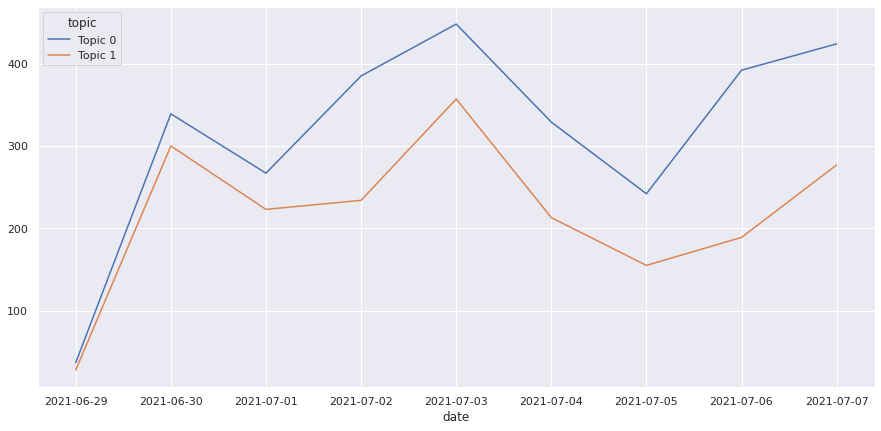

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df_topic.pivot_table(values="freq", index="date", columns="topic").plot(ax=ax)

Text(0, 0.5, 'dens')

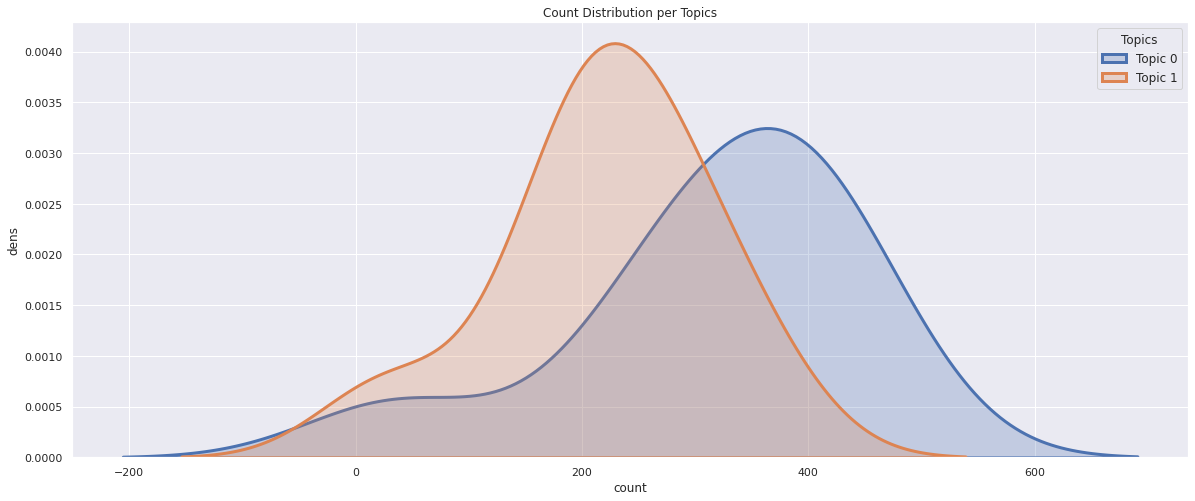

In [ ]:
# List of five airlines to plot
topics = ['Topic 0', 'Topic 1']

# Iterate through the five airlines
for topic in topics:
    # Subset to the airline
    subset = df_topic[df_topic['topic'] == topic]
    
    # Draw the density plot
    sns.set(rc={'figure.figsize':(20,8)})
    sns.distplot(subset['freq'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = topic)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Topics')
plt.title('Count Distribution per Topics')
plt.xlabel('count')
plt.ylabel('dens')

In [ ]:
#the most representative topics
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", 'Date']

# Show
sent_topics_sorteddf_mallet.head()

Topic_Num  ...        Date
0        0.0  ...  2021-07-02
1        1.0  ...  2021-07-01

[2 rows x 5 columns]

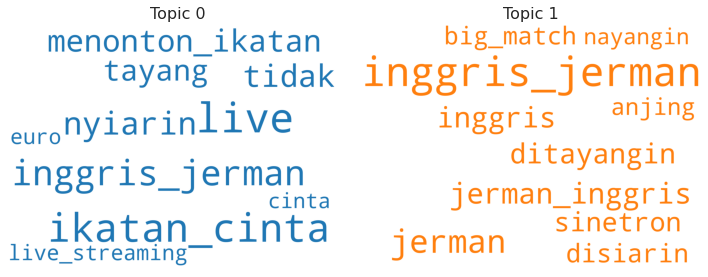

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=txt_stopword ,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(1,2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

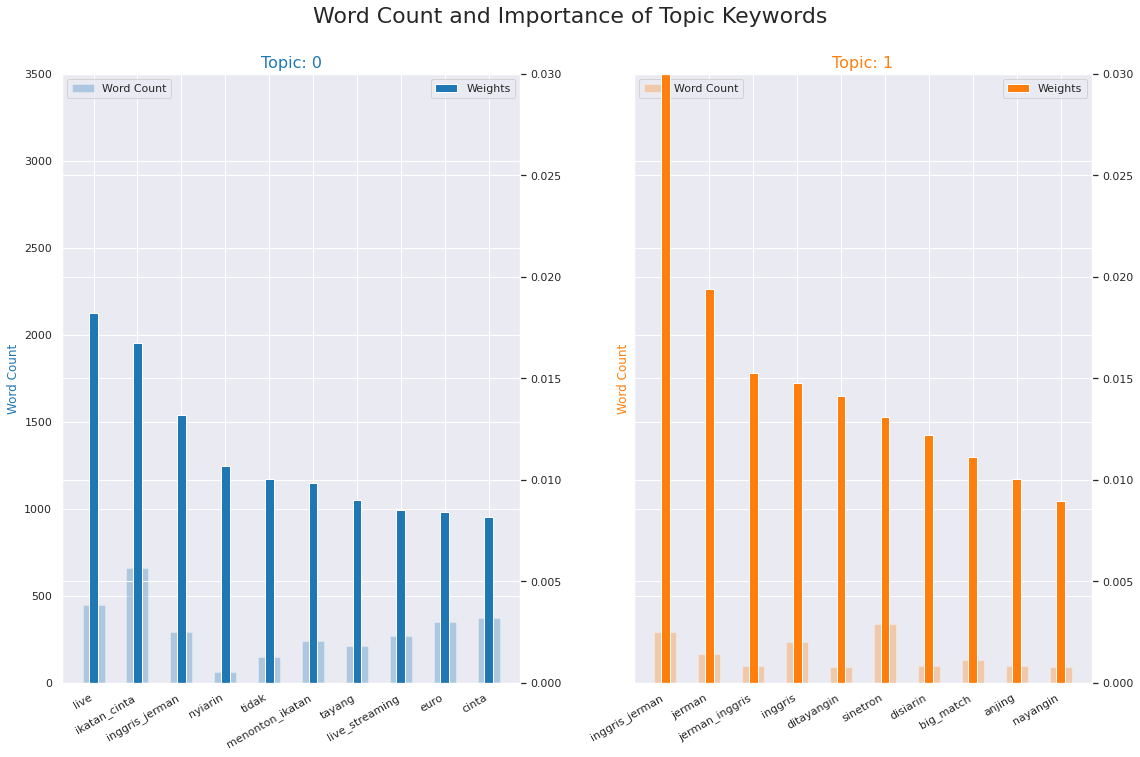

In [ ]:
from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in text_list for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(1,2, figsize=(16,10), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


# Topic Modelling Sentimen Analysis Positive (KNN)

In [ ]:
sentiment_positive = pd.read_excel('/content/Pos_KNN.xlsx')
text = sentiment_positive['tweet']

text_list =  [i.split() for i in text]

print(len(text_list))
print(text_list)

4827
[['proses', 'hukumnya', 'masih', 'direvisi'], ['setel', 'timer', 'menit', 'channel', 'berita', 'berita', 'meninggal', 'raiso', 'turu'], ['beneran', 'tayangin', 'film', 'bl'], ['ayo'], ['bola', 'ditunggu', 'abah', 'taunya'], ['link', 'live', 'streaming', 'inggris', 'denmark', 'semifinal', 'euro'], ['link', 'klik'], ['iya', 'kalah'], ['sinetron', 'rajawali', 'ayo', 'ngaku'], ['city', 'euro', 'today', 'euro', 'semifinal', 'inggris', 'denmark', 'kamis', 'juli', 'kick', 'off', 'wembley', 'stadium', 'london', 'inggris', 'live'], [], [], ['waduhliat', 'sinetron', 'ikatan', 'cinta', 'iku'], ['indo', 'masi', 'ikatan', 'cinta'], ['dear', 'produser', 'ikatan', 'cinta', 'ngebantu', 'naikin', 'imun', 'isoman', 'tolong', 'elsa', 'masukin', 'penjara', 'kenapa', 'dibelain', 'bu', 'sarah', 'ish'], ['pngen', 'chill', 'sama'], [], ['exo', 'lost', 'planet', 'jakarta'], ['kebiasaan', 'emak', 'saya', 'pantengin', 'sinetron', 'ikatan', 'cinta', 'diganti', 'sewot', 'ditonton'], ['ora', 'ono', 'umak', 'si

In [ ]:
pip install gensim

In [ ]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(1137 unique tokens: ['berita', 'channel', 'meninggal', 'menit', 'setel']...)


In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[9])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

4827
[(11, 1), (12, 2), (13, 2), (14, 3), (16, 1), (18, 1), (26, 1), (27, 1), (28, 1), (29, 3), (30, 1), (31, 3), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

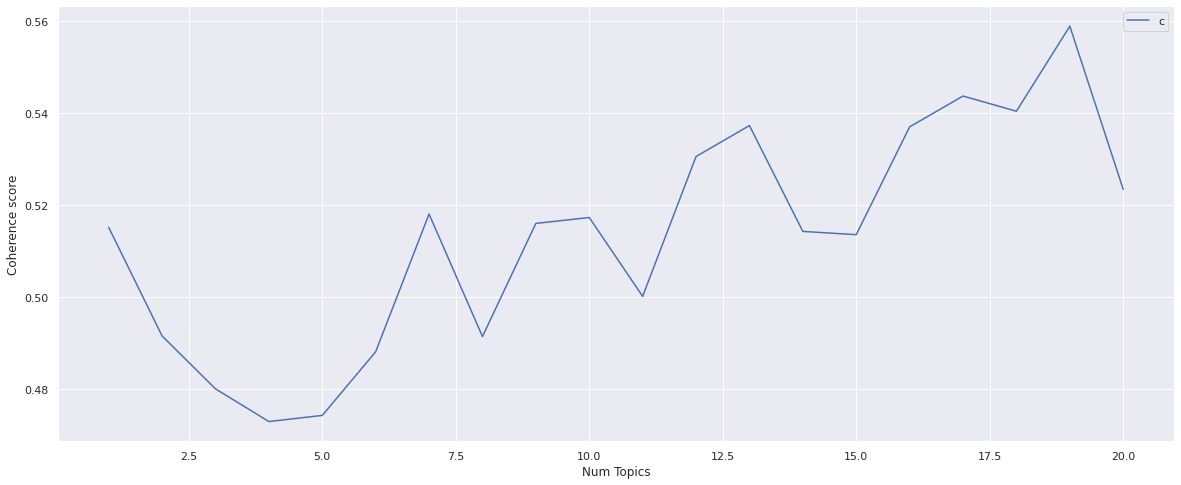

In [ ]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus = corpus_tfidf, 
                                                        texts = text_list, start= start, limit= limit, step= step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.515161
Num Topics = 2  has Coherence Value of 0.491546
Num Topics = 3  has Coherence Value of 0.480035
Num Topics = 4  has Coherence Value of 0.472928
Num Topics = 5  has Coherence Value of 0.474257
Num Topics = 6  has Coherence Value of 0.488093
Num Topics = 7  has Coherence Value of 0.518054
Num Topics = 8  has Coherence Value of 0.491412
Num Topics = 9  has Coherence Value of 0.516016
Num Topics = 10  has Coherence Value of 0.517298
Num Topics = 11  has Coherence Value of 0.500157
Num Topics = 12  has Coherence Value of 0.530566
Num Topics = 13  has Coherence Value of 0.537293
Num Topics = 14  has Coherence Value of 0.514277
Num Topics = 15  has Coherence Value of 0.513567
Num Topics = 16  has Coherence Value of 0.537014
Num Topics = 17  has Coherence Value of 0.543717
Num Topics = 18  has Coherence Value of 0.540416
Num Topics = 19  has Coherence Value of 0.558909
Num Topics = 20  has Coherence Value of 0.523429


In [ ]:
# Create the pandas DataFrame
df = pd.DataFrame(columns = ['topic', 'coherence_value'])
for m, cv in zip(x, coherence_values):
    new_row = {'topic': m, 'coherence_value':round(cv, 6)}
    df = df.append(new_row, ignore_index=True)

df.sort_values(by='coherence_value', ascending=False).reset_index().drop(columns='index')

topic  coherence_value
0    19.0         0.558909
1    17.0         0.543717
2    18.0         0.540416
3    13.0         0.537293
4    16.0         0.537014
5    12.0         0.530566
6    20.0         0.523429
7     7.0         0.518054
8    10.0         0.517298
9     9.0         0.516016
10    1.0         0.515161
11   14.0         0.514277
12   15.0         0.513567
13   11.0         0.500157
14    2.0         0.491546
15    8.0         0.491412
16    6.0         0.488093
17    3.0         0.480035
18    5.0         0.474257
19    4.0         0.472928

**Topic Modelling Tweets Text SA Positive**

In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics= 5) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic)) 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 Word: 0.037*"inggris_jerman" + 0.032*"jerman_inggris" + 0.026*"ikatan_cinta" + 0.026*"jerman" + 0.025*"big_match" + 0.023*"nayangin" + 0.020*"menonton_ikatan" + 0.018*"inggris" + 0.017*"nyiarin" + 0.016*"euro"

Topic: 1 Word: 0.036*"live" + 0.023*"live_streaming" + 0.022*"swedia_ukraina" + 0.014*"saksikan_program" + 0.012*"streaming" + 0.011*"piala_eropa" + 0.010*"saksikan" + 0.010*"perempat_final" + 0.010*"ko" + 0.009*"euro"

Topic: 2 Word: 0.024*"sinetron" + 0.024*"pictures" + 0.022*"tidak_ada" + 0.022*"suka_sinetron" + 0.022*"ayah_berbeda" + 0.015*"tidak" + 0.012*"suka" + 0.011*"ayah" + 0.011*"berbeda" + 0.011*"sinetronamab"

Topic: 3 Word: 0.021*"tayang" + 0.016*"video_wik" + 0.015*"sama" + 0.012*"video" + 0.012*"wik" + 0.012*"german" + 0.012*"link" + 0.012*"link_download" + 0.012*"jam" + 0.012*"nungguin"

Topic: 4 Word: 0.061*"inggris_jerman" + 0.032*"disiarin" + 0.026*"jerman" + 0.024*"ditayangin" + 0.023*"inggris" + 0.017*"siarin" + 0.010*"plus" + 0.010*"bola" + 0.009*"

In [ ]:
import pandas as pd

top_words_per_topic = []

for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])

#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])

print(df)

    Topic              Word         P
0       0    inggris_jerman  0.037237
1       0    jerman_inggris  0.032385
2       0      ikatan_cinta  0.026297
3       0            jerman  0.026207
4       0         big_match  0.025076
5       0          nayangin  0.023400
6       0   menonton_ikatan  0.019551
7       0           inggris  0.018332
8       0           nyiarin  0.016978
9       0              euro  0.015732
10      1              live  0.036348
11      1    live_streaming  0.022653
12      1    swedia_ukraina  0.022373
13      1  saksikan_program  0.013820
14      1         streaming  0.011975
15      1       piala_eropa  0.010633
16      1          saksikan  0.010056
17      1    perempat_final  0.009930
18      1                ko  0.009925
19      1              euro  0.009456
20      2          sinetron  0.023891
21      2          pictures  0.023851
22      2         tidak_ada  0.022256
23      2     suka_sinetron  0.022219
24      2      ayah_berbeda  0.022153
25      2   

In [ ]:
pip install pyLDAvis==2.1.2

In [ ]:
!pip install --upgrade pandas==1.2

In [ ]:
# Predict Topic in Tweets Text


topics_tweets_text_dict = {}


for idx, topic in model.print_topics(-1 ):
    topics_tweets_text_dict[ topic.split("*")[1].split(" ")[0]] = idx
    #print('Topic: {} Word: {}\n'.format(idx, topic)) 

print( topics_tweets_text_dict )





def getTopicForQuery ( tweet_text ):


    ques_vec = []
    ques_vec = dictionary.doc2bow(  tweet_text )

    topic_vec = []
    topic_vec = model[ques_vec]

    word_count_array = np.empty((len(topic_vec), 2), dtype = np.object)
    for i in range(len(topic_vec)):
        word_count_array[i, 0] = topic_vec[i][0]
        word_count_array[i, 1] = topic_vec[i][1]

    idx = np.argsort(word_count_array[:, 1])
    idx = idx[::-1]
    word_count_array = word_count_array[idx]

    final = []
    final = model.print_topic(word_count_array[0, 0], 1)

    question_topic = final.split('*') ## as format is like "probability * topic"

    return topics_tweets_text_dict[ question_topic[1] ] #final#question_topic #topics_tweets_text_dict[ question_topic[1] ] #question_topic[1]

for i in range(10):
  print("Tweets Text ke- {} {} Topik {}".format( i + 1 , text_list[i] , getTopicForQuery( text_list[i]) ) )

#getTopicForQuery( text_list[0] ) #"min login apps browser gak mohon bantuannya" )


{'"inggris_jerman"': 4, '"live"': 1, '"sinetron"': 2, '"tayang"': 3}
Tweets Text ke- 1 ['proses', 'hukumnya', 'masih', 'direvisi'] Topik 4
Tweets Text ke- 2 ['setel', 'timer', 'menit', 'channel', 'berita', 'berita', 'meninggal', 'raiso', 'turu'] Topik 4
Tweets Text ke- 3 ['beneran', 'tayangin', 'film', 'bl'] Topik 4
Tweets Text ke- 4 ['ayo'] Topik 4
Tweets Text ke- 5 ['bola', 'ditunggu', 'abah', 'taunya'] Topik 4
Tweets Text ke- 6 ['link', 'live', 'streaming', 'inggris', 'denmark', 'semifinal', 'euro', 'live_streaming', 'inggris_denmark', 'semifinal_euro', 'live_streaming', 'inggris_denmark', 'semifinal_euro', 'live_streaming', 'inggris_denmark', 'semifinal_euro'] Topik 1
Tweets Text ke- 7 ['link', 'klik'] Topik 3
Tweets Text ke- 8 ['iya', 'kalah'] Topik 1
Tweets Text ke- 9 ['sinetron', 'rajawali', 'ayo', 'ngaku', 'ayo_ngaku', 'ayo_ngaku', 'ayo_ngaku'] Topik 4
Tweets Text ke- 10 ['city', 'euro', 'today', 'euro', 'semifinal', 'inggris', 'denmark', 'kamis', 'juli', 'kick', 'off', 'wemble

In [ ]:
topics_tweets_text_list = []

for tweet_texts in text_list :

  topics_tweets_texts = getTopicForQuery( tweet_texts )

  topics_tweets_text_list.append( topics_tweets_texts ) #text_list.append( topics_tweets_texts ) #topics_tweets_text_list.append( topics_tweets_texts ) #text_list.append( topics_tweets_texts )

sentiment_positive["Tweets Text Topic Predicted"] = topics_tweets_text_list
sentiment_positive.head()

Unnamed: 0  ... Tweets Text Topic Predicted
0           0  ...                           4
1           1  ...                           4
2           2  ...                           4
3           3  ...                           4
4           4  ...                           4

[5 rows x 4 columns]

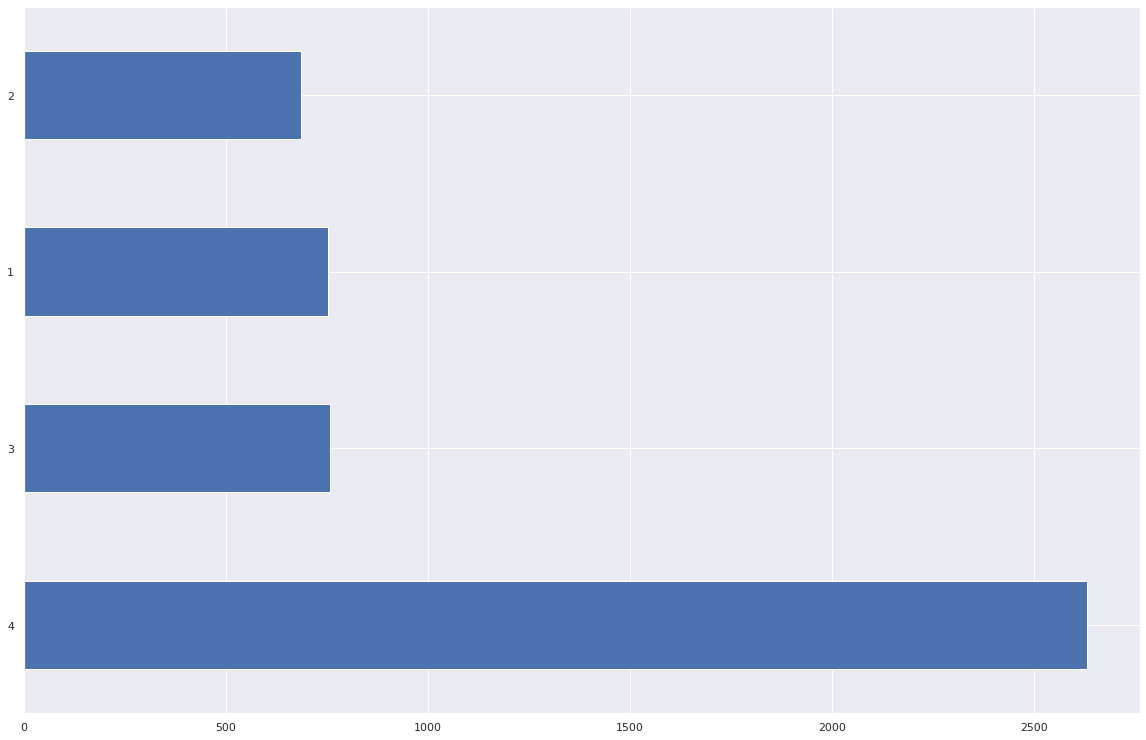

In [ ]:
# Plot Topics Predicted in RCTI Tweets Texts

sentiment_positive["Tweets Text Topic Predicted"].value_counts().plot( kind = "barh" , figsize = ( 20 , 13 ))

In [ ]:
pip install wordcloud

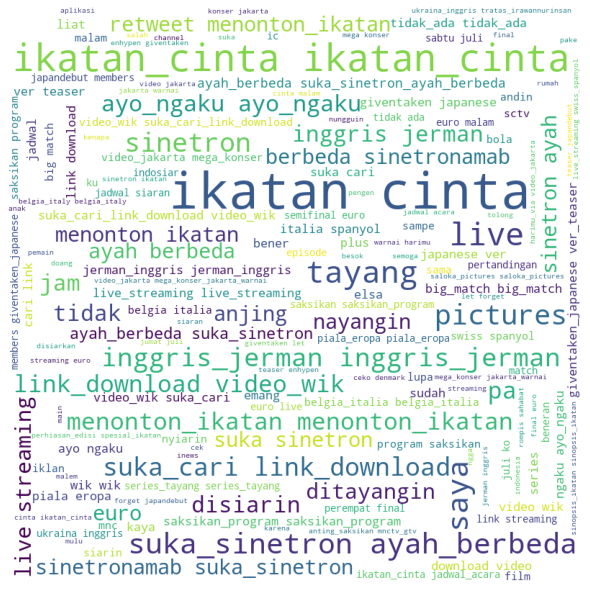

In [ ]:
text_list_join_all_words = ""

for tweet_text in text_list :
  
    for word in tweet_text :

        text_list_join_all_words = text_list_join_all_words + " " + word

# importing all necessery modules
from wordcloud import WordCloud #, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate( text_list_join_all_words )
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
text_list

[['proses', 'hukumnya', 'masih', 'direvisi'],
 ['setel',
  'timer',
  'menit',
  'channel',
  'berita',
  'berita',
  'meninggal',
  'raiso',
  'turu'],
 ['beneran', 'tayangin', 'film', 'bl'],
 ['ayo'],
 ['bola', 'ditunggu', 'abah', 'taunya'],
 ['link',
  'live',
  'streaming',
  'inggris',
  'denmark',
  'semifinal',
  'euro',
  'live_streaming',
  'inggris_denmark',
  'semifinal_euro',
  'live_streaming',
  'inggris_denmark',
  'semifinal_euro',
  'live_streaming',
  'inggris_denmark',
  'semifinal_euro'],
 ['link', 'klik'],
 ['iya', 'kalah'],
 ['sinetron',
  'rajawali',
  'ayo',
  'ngaku',
  'ayo_ngaku',
  'ayo_ngaku',
  'ayo_ngaku'],
 ['city',
  'euro',
  'today',
  'euro',
  'semifinal',
  'inggris',
  'denmark',
  'kamis',
  'juli',
  'kick',
  'off',
  'wembley',
  'stadium',
  'london',
  'inggris',
  'live',
  'inggris_denmark',
  'kamis_juli',
  'kick_off',
  'inggris_denmark',
  'kamis_juli',
  'kick_off',
  'wembley_stadium',
  'inggris_denmark',
  'kamis_juli',
  'kick_off

In [ ]:
import gensim
import pyLDAvis.gensim ; pyLDAvis.enable_notebook()

panel = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.display(panel)

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([ int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    time = rcti_twitter_data['date']
    contents  = contents.reset_index(drop=True)
    time = time.reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, contents, time], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(model, corpus_tfidf, text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Date']
print(df_dominant_topic.shape)
df_dominant_topic.head()

(5613, 6)


Document_No  ...        Date
0            0  ...  2021-07-07
1            1  ...  2021-07-07
2            2  ...  2021-07-07
3            3  ...  2021-07-07
4            4  ...  2021-07-07

[5 rows x 6 columns]

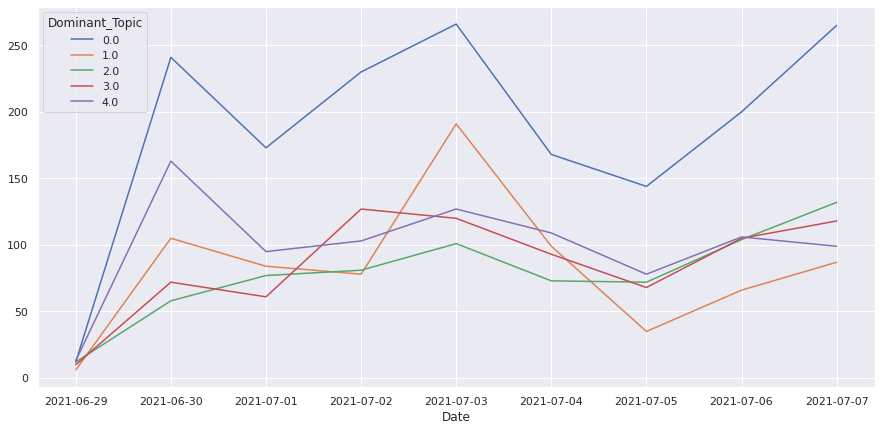

In [ ]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_dominant_topic.groupby(['Date', 'Dominant_Topic']).count()['Text'].unstack().plot(ax=ax)

In [ ]:
frequency_dominant_topic = df_dominant_topic['Dominant_Topic'].value_counts().reset_index()
frequency_dominant_topic['%Frequency'] = (frequency_dominant_topic['Dominant_Topic'] / frequency_dominant_topic['Dominant_Topic'].sum())*100
frequency_dominant_topic.columns = ['Dominant_Topic','Frequency','%Frequency']
frequency_dominant_topic.sort_values('Dominant_Topic', ascending=True)

Dominant_Topic  Frequency  %Frequency
0             0.0       1699   35.197845
3             1.0        751   15.558318
4             2.0        710   14.708929
2             3.0        774   16.034804
1             4.0        893   18.500104

In [ ]:
df_topic0 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 0.0]['Date'].value_counts().sort_index()).reset_index()
df_topic0.columns = ['date', 'freq']
df_topic0['topic'] = 'Topic 0'
df_topic0

date  freq    topic
0  2021-06-29    12  Topic 0
1  2021-06-30   241  Topic 0
2  2021-07-01   173  Topic 0
3  2021-07-02   230  Topic 0
4  2021-07-03   266  Topic 0
5  2021-07-04   168  Topic 0
6  2021-07-05   144  Topic 0
7  2021-07-06   200  Topic 0
8  2021-07-07   265  Topic 0

In [ ]:
df_topic1 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 1.0]['Date'].value_counts().sort_index()).reset_index()
df_topic1.columns = ['date', 'freq']
df_topic1['topic'] = 'Topic 1'

df_topic2 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 2.0]['Date'].value_counts().sort_index()).reset_index()
df_topic2.columns = ['date', 'freq']
df_topic2['topic'] = 'Topic 2'

df_topic3 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 3.0]['Date'].value_counts().sort_index()).reset_index()
df_topic3.columns = ['date', 'freq']
df_topic3['topic'] = 'Topic 3'

df_topic4 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 4.0]['Date'].value_counts().sort_index()).reset_index()
df_topic4.columns = ['date', 'freq']
df_topic4['topic'] = 'Topic 4'

print( len(df_topic0) + len(df_topic1) + len(df_topic2) + len(df_topic3) +len(df_topic4) )

45


In [ ]:
df_topic = pd.concat([df_topic0, df_topic1, df_topic2, df_topic3,df_topic4], ignore_index=True)
df_topic.shape

(45, 3)

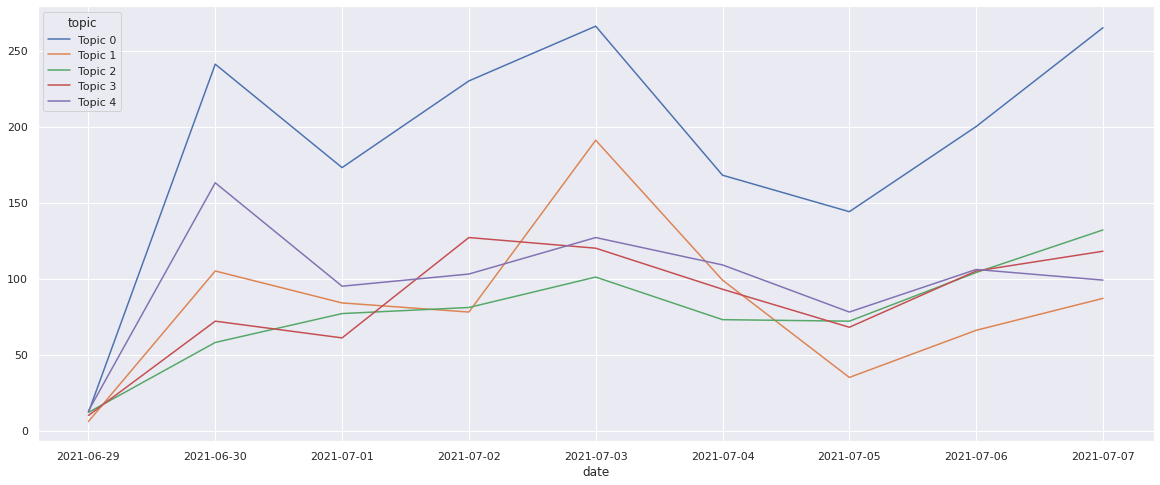

In [ ]:
df_topic.pivot_table(values="freq", index="date", columns="topic").plot()

Text(0, 0.5, 'dens')

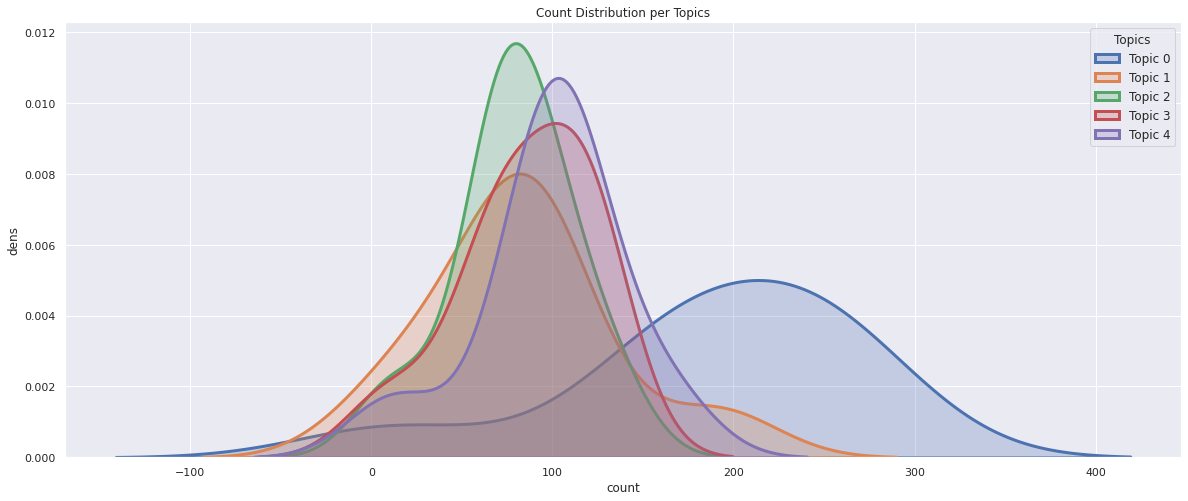

In [ ]:
# List of five airlines to plot
topics = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3','Topic 4']

# Iterate through the five airlines
for topic in topics:
    # Subset to the airline
    subset = df_topic[df_topic['topic'] == topic]
    
    # Draw the density plot
    sns.set(rc={'figure.figsize':(20,8)})
    sns.distplot(subset['freq'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = topic)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Topics')
plt.title('Count Distribution per Topics')
plt.xlabel('count')
plt.ylabel('dens')

In [ ]:
#the most representative topics
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", 'Date']

# Show
sent_topics_sorteddf_mallet.head()

Topic_Num  ...        Date
0        0.0  ...  2021-07-05
1        1.0  ...  2021-07-03
2        2.0  ...  2021-07-03
3        3.0  ...  2021-07-02
4        4.0  ...  2021-07-06

[5 rows x 5 columns]

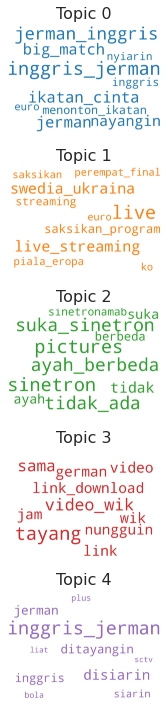

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=txt_stopword ,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(5,1, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

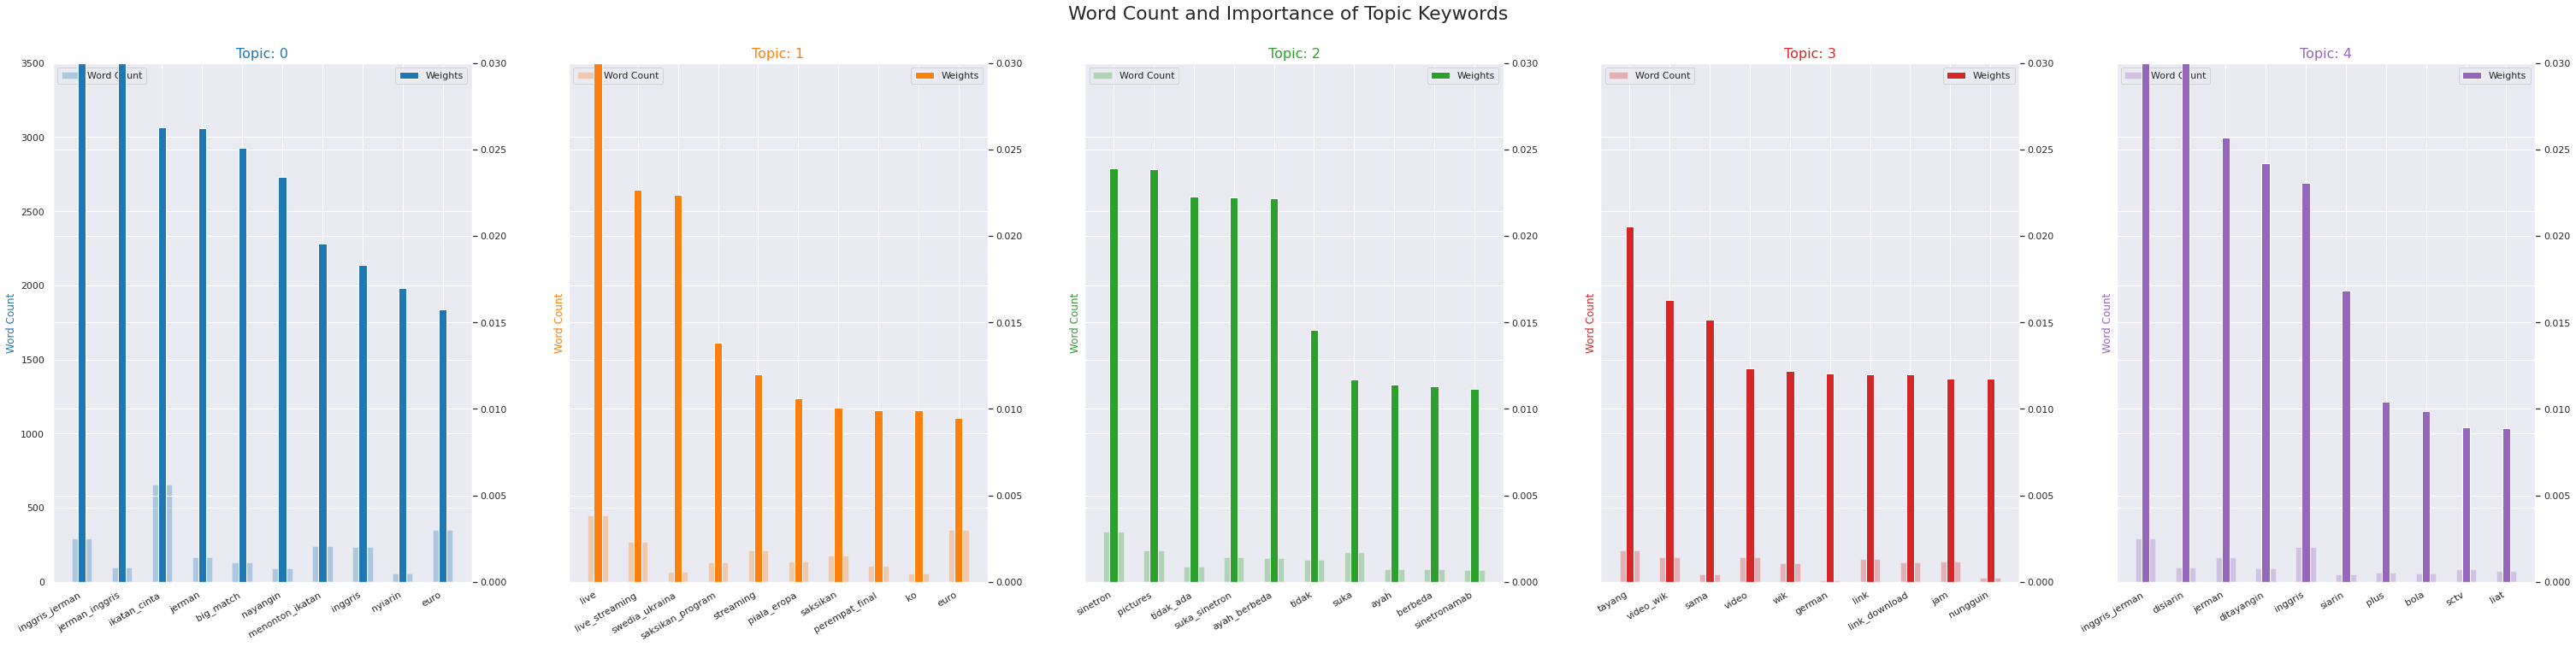

In [ ]:
from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in text_list for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(1,5, figsize=(42,10), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


# Topic&nbsp;Modelling&nbsp;Sentiment&nbsp;Negative

In [ ]:
sentiment_negative = pd.read_excel('/content/Neg_KNN.xlsx')
text = sentiment_negative['tweet']

text_list =  [i.split() for i in text]

print(len(text_list))
print(text_list)

12
[['jadwal', 'olahraga', 'juli', 'semifinal', 'inews', 'afc', 'champions', 'league', 'mls', 'bein', 'sports', 'wimbledon', 'fox', 'sports', 'many'], ['liatnya', 'poster', 'sinetron'], ['nyiarin', 'italy'], ['bener', 'bener', 'tidak', 'nyiarin', 'italy', 'belgia'], ['nyiarin'], ['nyiarin'], ['nyiarin', 'belgia', 'italy'], ['bener', 'nayangin'], ['jokowi', 'umumkan', 'syuting', 'sinetron', 'dilarang', 'ppkm', 'darurat'], ['bener'], ['bener'], ['jadwal', 'acara', 'selasa', 'juni', 'euro', 'sportacular', 'ikatan', 'cinta']]


In [ ]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.9) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(36 unique tokens: ['afc', 'bein', 'champions', 'fox', 'inews']...)


In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[4])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

12
[(18, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

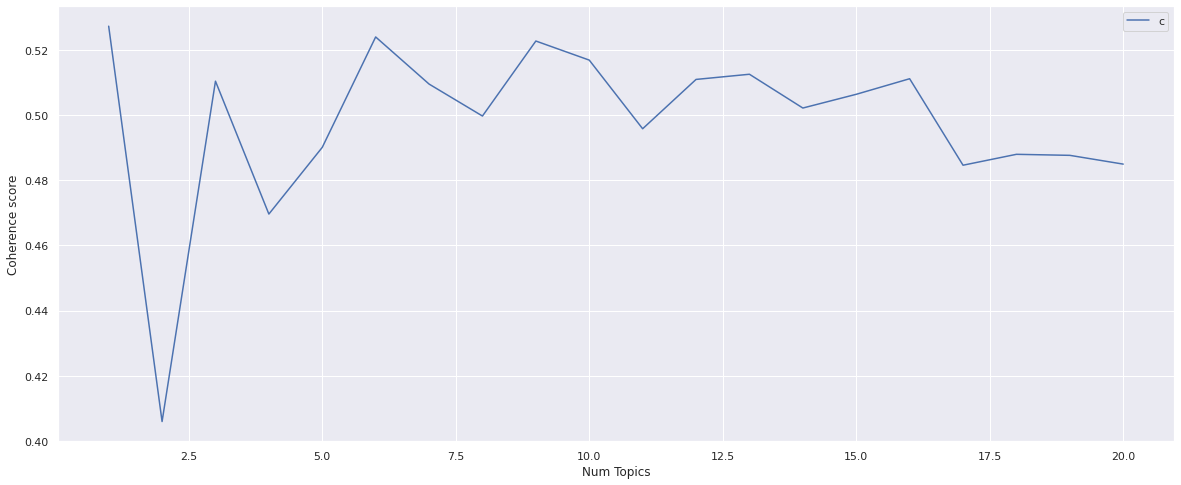

In [ ]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus = corpus_tfidf, 
                                                        texts = text_list, start= start, limit= limit, step= step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.527309
Num Topics = 2  has Coherence Value of 0.40596
Num Topics = 3  has Coherence Value of 0.510428
Num Topics = 4  has Coherence Value of 0.469641
Num Topics = 5  has Coherence Value of 0.490117
Num Topics = 6  has Coherence Value of 0.524003
Num Topics = 7  has Coherence Value of 0.509548
Num Topics = 8  has Coherence Value of 0.499732
Num Topics = 9  has Coherence Value of 0.522755
Num Topics = 10  has Coherence Value of 0.516898
Num Topics = 11  has Coherence Value of 0.495829
Num Topics = 12  has Coherence Value of 0.510966
Num Topics = 13  has Coherence Value of 0.512556
Num Topics = 14  has Coherence Value of 0.502187
Num Topics = 15  has Coherence Value of 0.506403
Num Topics = 16  has Coherence Value of 0.511183
Num Topics = 17  has Coherence Value of 0.484635
Num Topics = 18  has Coherence Value of 0.487981
Num Topics = 19  has Coherence Value of 0.487664
Num Topics = 20  has Coherence Value of 0.484972


In [ ]:
# Create the pandas DataFrame
df = pd.DataFrame(columns = ['topic', 'coherence_value'])
for m, cv in zip(x, coherence_values):
    new_row = {'topic': m, 'coherence_value':round(cv, 6)}
    df = df.append(new_row, ignore_index=True)

df.sort_values(by='coherence_value', ascending=False).reset_index().drop(columns='index')

topic  coherence_value
0     1.0         0.527309
1     6.0         0.524003
2     9.0         0.522755
3    10.0         0.516898
4    13.0         0.512556
5    16.0         0.511183
6    12.0         0.510966
7     3.0         0.510428
8     7.0         0.509548
9    15.0         0.506403
10   14.0         0.502187
11    8.0         0.499732
12   11.0         0.495829
13    5.0         0.490117
14   18.0         0.487981
15   19.0         0.487664
16   20.0         0.484972
17   17.0         0.484635
18    4.0         0.469641
19    2.0         0.405960

In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics= 6) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic)) 

Topic: 0 Word: 0.029*"nyiarin" + 0.029*"bener" + 0.028*"italy" + 0.028*"nayangin" + 0.028*"belgia" + 0.028*"liatnya" + 0.028*"poster" + 0.028*"sinetron" + 0.028*"tidak" + 0.028*"cinta"

Topic: 1 Word: 0.142*"bener" + 0.064*"tidak" + 0.050*"belgia" + 0.044*"selasa" + 0.044*"acara" + 0.044*"euro" + 0.044*"juni" + 0.044*"sportacular" + 0.044*"cinta" + 0.044*"ikatan"

Topic: 2 Word: 0.165*"bener" + 0.025*"nyiarin" + 0.024*"italy" + 0.024*"nayangin" + 0.024*"belgia" + 0.024*"poster" + 0.024*"liatnya" + 0.024*"sinetron" + 0.024*"tidak" + 0.024*"darurat"

Topic: 3 Word: 0.103*"poster" + 0.103*"liatnya" + 0.080*"sinetron" + 0.022*"nyiarin" + 0.022*"bener" + 0.022*"italy" + 0.022*"belgia" + 0.022*"nayangin" + 0.022*"ikatan" + 0.022*"tidak"

Topic: 4 Word: 0.103*"italy" + 0.069*"nyiarin" + 0.059*"belgia" + 0.043*"sports" + 0.036*"ppkm" + 0.036*"umumkan" + 0.036*"dilarang" + 0.036*"syuting" + 0.036*"jokowi" + 0.036*"darurat"

Topic: 5 Word: 0.231*"nyiarin" + 0.115*"nayangin" + 0.062*"bener" + 0.0

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
import pandas as pd

top_words_per_topic = []

for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])

#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])

print(df)

    Topic         Word         P
0       0      nyiarin  0.028725
1       0        bener  0.028653
2       0        italy  0.028019
3       0     nayangin  0.027876
4       0       belgia  0.027831
5       0      liatnya  0.027793
6       0       poster  0.027778
7       0     sinetron  0.027761
8       0        tidak  0.027756
9       0        cinta  0.027735
10      1        bener  0.141845
11      1        tidak  0.064440
12      1       belgia  0.050416
13      1       selasa  0.044435
14      1        acara  0.044422
15      1         euro  0.044419
16      1         juni  0.044419
17      1  sportacular  0.044412
18      1        cinta  0.044398
19      1       ikatan  0.044390
20      2        bener  0.165349
21      2      nyiarin  0.024564
22      2        italy  0.023995
23      2     nayangin  0.023977
24      2       belgia  0.023940
25      2       poster  0.023886
26      2      liatnya  0.023878
27      2     sinetron  0.023867
28      2        tidak  0.023849
29      2 

In [ ]:
import pandas as pd

top_words_per_topic = []

for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])

#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")

print(df)

None


**Topic Modelling Visualizations**

In [ ]:
pip install pyLDAvis==2.1.2

In [ ]:
import gensim
import pyLDAvis.gensim ; pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare( model, corpus_tfidf, dictionary )

print(data)

pyLDAvis.save_html(data, 'Topic Modelling Visaulization_RCTI.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.057533 -0.002707       1        1  36.702192
1     -0.066826  0.008229       2        1  22.281266
5      0.003147 -0.070092       3        1  13.995690
3      0.021517  0.046231       4        1  10.835074
2     -0.022744  0.006766       5        1  10.441398
0      0.007373  0.011573       6        1   5.744380, topic_info=        Term      Freq     Total Category  logprob  loglift
18   nyiarin  1.000000  1.000000  Default  30.0000  30.0000
20     bener  1.000000  1.000000  Default  29.0000  29.0000
22  nayangin  0.000000  0.000000  Default  28.0000  28.0000
15    poster  0.000000  0.000000  Default  27.0000  27.0000
14   liatnya  0.000000  0.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
20     bener  0.035019  1.396655   Topic6  -3.5525  -0.8290
18   nyiarin  0.035108  1.522022   Topic6  -3

In [ ]:
# Predict Topic in Tweets Text


topics_tweets_text_dict = {}


for idx, topic in model.print_topics(-1 ):
    topics_tweets_text_dict[ topic.split("*")[1].split(" ")[0]] = idx
    #print('Topic: {} Word: {}\n'.format(idx, topic)) 

print( topics_tweets_text_dict )





def getTopicForQuery ( tweet_text ):


    ques_vec = []
    ques_vec = dictionary.doc2bow(  tweet_text )

    topic_vec = []
    topic_vec = model[ques_vec]

    word_count_array = np.empty((len(topic_vec), 2), dtype = np.object)
    for i in range(len(topic_vec)):
        word_count_array[i, 0] = topic_vec[i][0]
        word_count_array[i, 1] = topic_vec[i][1]

    idx = np.argsort(word_count_array[:, 1])
    idx = idx[::-1]
    word_count_array = word_count_array[idx]

    final = []
    final = model.print_topic(word_count_array[0, 0], 1)

    question_topic = final.split('*') ## as format is like "probability * topic"

    return topics_tweets_text_dict[ question_topic[1] ] #final#question_topic #topics_tweets_text_dict[ question_topic[1] ] #question_topic[1]

for i in range(10):
  print("Tweets Text ke- {} {} Topik {}".format( i + 1 , text_list[i] , getTopicForQuery( text_list[i]) ) )

#getTopicForQuery( text_list[0] ) #"min login apps browser gak mohon bantuannya" )


{'"nyiarin"': 5, '"bener"': 2, '"poster"': 3, '"italy"': 4}
Tweets Text ke- 1 ['jadwal', 'olahraga', 'juli', 'semifinal', 'inews', 'afc', 'champions', 'league', 'mls', 'bein', 'sports', 'wimbledon', 'fox', 'sports', 'many'] Topik 4
Tweets Text ke- 2 ['liatnya', 'poster', 'sinetron'] Topik 3
Tweets Text ke- 3 ['nyiarin', 'italy'] Topik 4
Tweets Text ke- 4 ['bener', 'bener', 'tidak', 'nyiarin', 'italy', 'belgia'] Topik 2
Tweets Text ke- 5 ['nyiarin'] Topik 5
Tweets Text ke- 6 ['nyiarin'] Topik 5
Tweets Text ke- 7 ['nyiarin', 'belgia', 'italy'] Topik 4
Tweets Text ke- 8 ['bener', 'nayangin'] Topik 5
Tweets Text ke- 9 ['jokowi', 'umumkan', 'syuting', 'sinetron', 'dilarang', 'ppkm', 'darurat'] Topik 4
Tweets Text ke- 10 ['bener'] Topik 2


In [ ]:
topics_tweets_text_list = []

for tweet_texts in text_list :

  topics_tweets_texts = getTopicForQuery( tweet_texts )

  topics_tweets_text_list.append( topics_tweets_texts ) #text_list.append( topics_tweets_texts ) #topics_tweets_text_list.append( topics_tweets_texts ) #text_list.append( topics_tweets_texts )

sentiment_negative["Tweets Text Topic Predicted"] = topics_tweets_text_list
sentiment_negative.head()

Unnamed: 0  ... Tweets Text Topic Predicted
0         298  ...                           4
1        1871  ...                           3
2        2503  ...                           4
3        2777  ...                           2
4        2874  ...                           5

[5 rows x 4 columns]

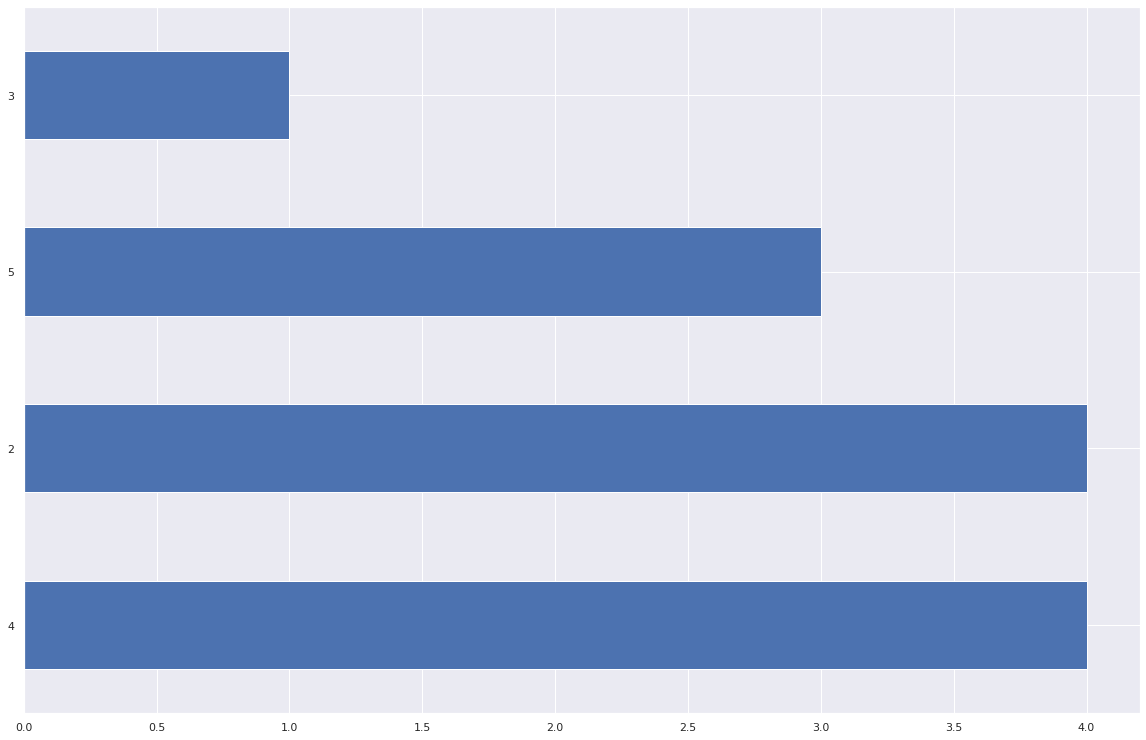

In [ ]:
# Plot Topics Predicted in RCTI Tweets Texts

sentiment_negative["Tweets Text Topic Predicted"].value_counts().plot( kind = "barh" , figsize = ( 20 , 13 ))

In [ ]:
sentiment_positive

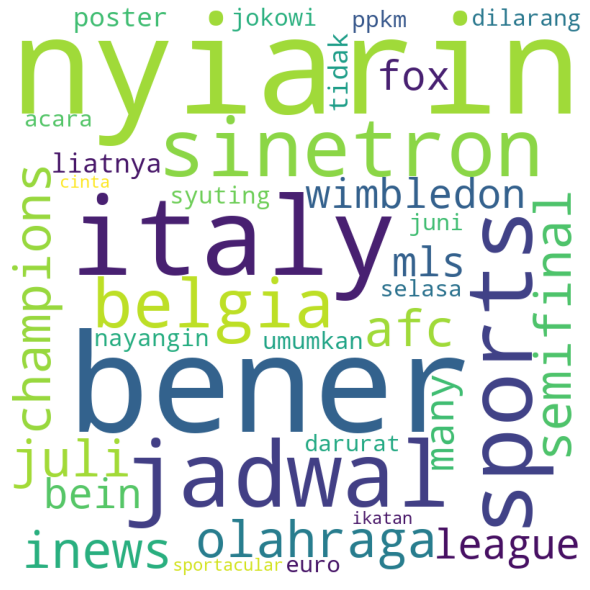

In [ ]:
text_list_join_all_words = ""

for tweet_text in text_list :
  
    for word in tweet_text :

        text_list_join_all_words = text_list_join_all_words + " " + word

# importing all necessery modules
from wordcloud import WordCloud #, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate( text_list_join_all_words )
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
text_list

[['jadwal',
  'olahraga',
  'juli',
  'semifinal',
  'inews',
  'afc',
  'champions',
  'league',
  'mls',
  'bein',
  'sports',
  'wimbledon',
  'fox',
  'sports',
  'many'],
 ['liatnya', 'poster', 'sinetron'],
 ['nyiarin', 'italy'],
 ['bener', 'bener', 'tidak', 'nyiarin', 'italy', 'belgia'],
 ['nyiarin'],
 ['nyiarin'],
 ['nyiarin', 'belgia', 'italy'],
 ['bener', 'nayangin'],
 ['jokowi', 'umumkan', 'syuting', 'sinetron', 'dilarang', 'ppkm', 'darurat'],
 ['bener'],
 ['bener'],
 ['jadwal',
  'acara',
  'selasa',
  'juni',
  'euro',
  'sportacular',
  'ikatan',
  'cinta']]

In [ ]:
import gensim
import pyLDAvis.gensim ; pyLDAvis.enable_notebook()

panel = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.display(panel)

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([ int(topic_num), round(prop_topic,5), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    time = rcti_twitter_data['date']
    contents  = contents.reset_index(drop=True)
    time = time.reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, contents, time], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(model, corpus_tfidf, text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Date']
print(df_dominant_topic.shape)
df_dominant_topic.head()

(5613, 6)


Document_No  ...        Date
0            0  ...  2021-07-07
1            1  ...  2021-07-07
2            2  ...  2021-07-07
3            3  ...  2021-07-07
4            4  ...  2021-07-07

[5 rows x 6 columns]

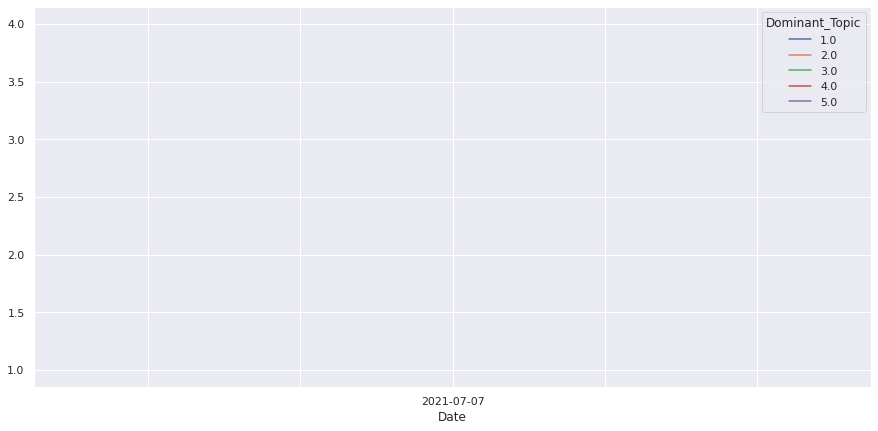

In [ ]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_dominant_topic.groupby(['Date', 'Dominant_Topic']).count()['Text'].unstack().plot(ax=ax)

In [ ]:
frequency_dominant_topic = df_dominant_topic['Dominant_Topic'].value_counts().reset_index()
frequency_dominant_topic['%Frequency'] = (frequency_dominant_topic['Dominant_Topic'] / frequency_dominant_topic['Dominant_Topic'].sum())*100
frequency_dominant_topic.columns = ['Dominant_Topic','Frequency','%Frequency']
frequency_dominant_topic.sort_values('Dominant_Topic', ascending=True)

Dominant_Topic  Frequency  %Frequency
2             1.0          3   25.000000
3             2.0          1    8.333333
4             3.0          1    8.333333
0             4.0          4   33.333333
1             5.0          3   25.000000

In [ ]:
df_topic0 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 0.0]['Date'].value_counts().sort_index()).reset_index()
df_topic0.columns = ['date', 'freq']
df_topic0['topic'] = 'Topic 0'
df_topic0

Empty DataFrame
Columns: [date, freq, topic]
Index: []

In [ ]:
df_topic1 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 1.0]['Date'].value_counts().sort_index()).reset_index()
df_topic1.columns = ['date', 'freq']
df_topic1['topic'] = 'Topic 1'

df_topic2 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 2.0]['Date'].value_counts().sort_index()).reset_index()
df_topic2.columns = ['date', 'freq']
df_topic2['topic'] = 'Topic 2'

df_topic3 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 3.0]['Date'].value_counts().sort_index()).reset_index()
df_topic3.columns = ['date', 'freq']
df_topic3['topic'] = 'Topic 3'

df_topic4 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 4.0]['Date'].value_counts().sort_index()).reset_index()
df_topic4.columns = ['date', 'freq']
df_topic4['topic'] = 'Topic 4'
df_topic5 = pd.DataFrame(df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 5.0]['Date'].value_counts().sort_index()).reset_index()
df_topic5.columns = ['date', 'freq']
df_topic5['topic'] = 'Topic 5'

print( len(df_topic0) + len(df_topic1) + len(df_topic2) + len(df_topic3) +len(df_topic4)+len(df_topic5) )

5


In [ ]:
df_topic = pd.concat([df_topic0, df_topic1, df_topic2, df_topic3,df_topic4,df_topic5], ignore_index=True)
df_topic.shape

(5, 3)

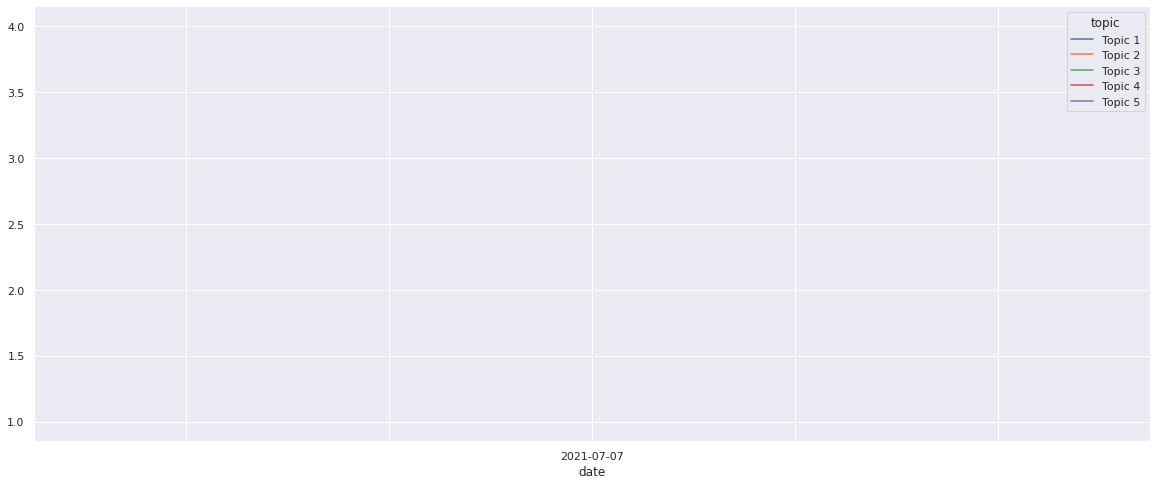

In [ ]:
df_topic.pivot_table(values="freq", index="date", columns="topic").plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-

Text(0, 0.5, 'dens')

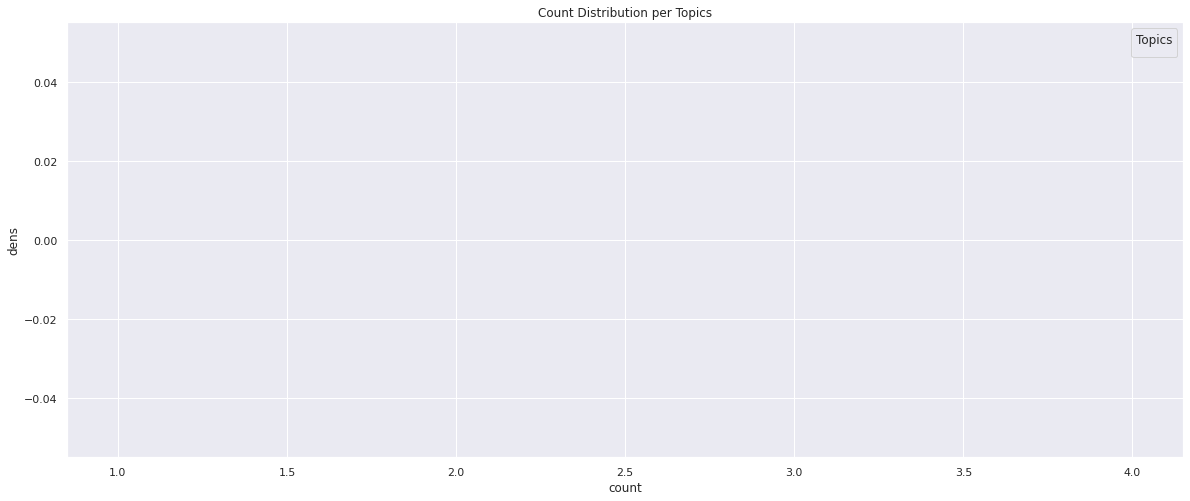

In [ ]:
# List of five airlines to plot
topics = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3','Topic 4','Topic 5']

# Iterate through the five airlines
for topic in topics:
    # Subset to the airline
    subset = df_topic[df_topic['topic'] == topic]
    
    # Draw the density plot
    sns.set(rc={'figure.figsize':(20,8)})
    sns.distplot(subset['freq'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = topic)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Topics')
plt.title('Count Distribution per Topics')
plt.xlabel('count')
plt.ylabel('dens')

In [ ]:
#the most representative topics
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", 'Date']

# Show
sent_topics_sorteddf_mallet.head()

Topic_Num  ...        Date
0        1.0  ...  2021-07-07
1        2.0  ...  2021-07-07
2        3.0  ...  2021-07-07
3        4.0  ...  2021-07-07
4        5.0  ...  2021-07-07

[5 rows x 5 columns]

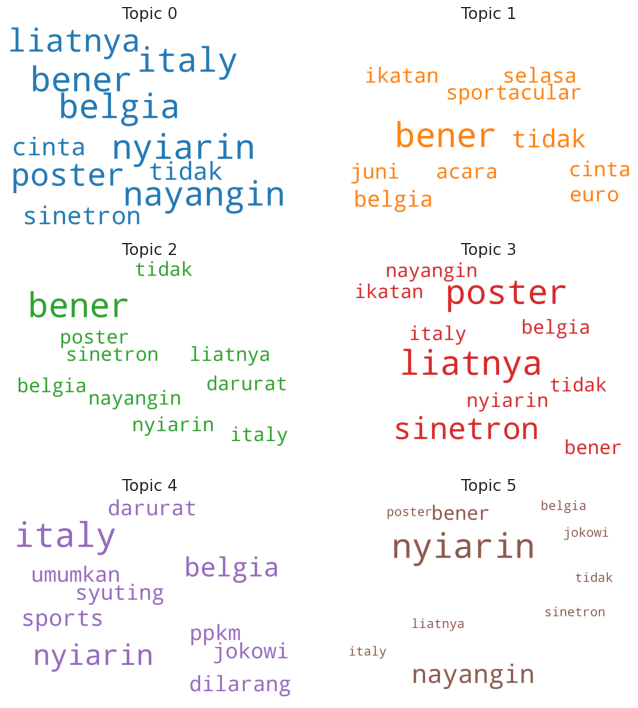

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=txt_stopword ,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

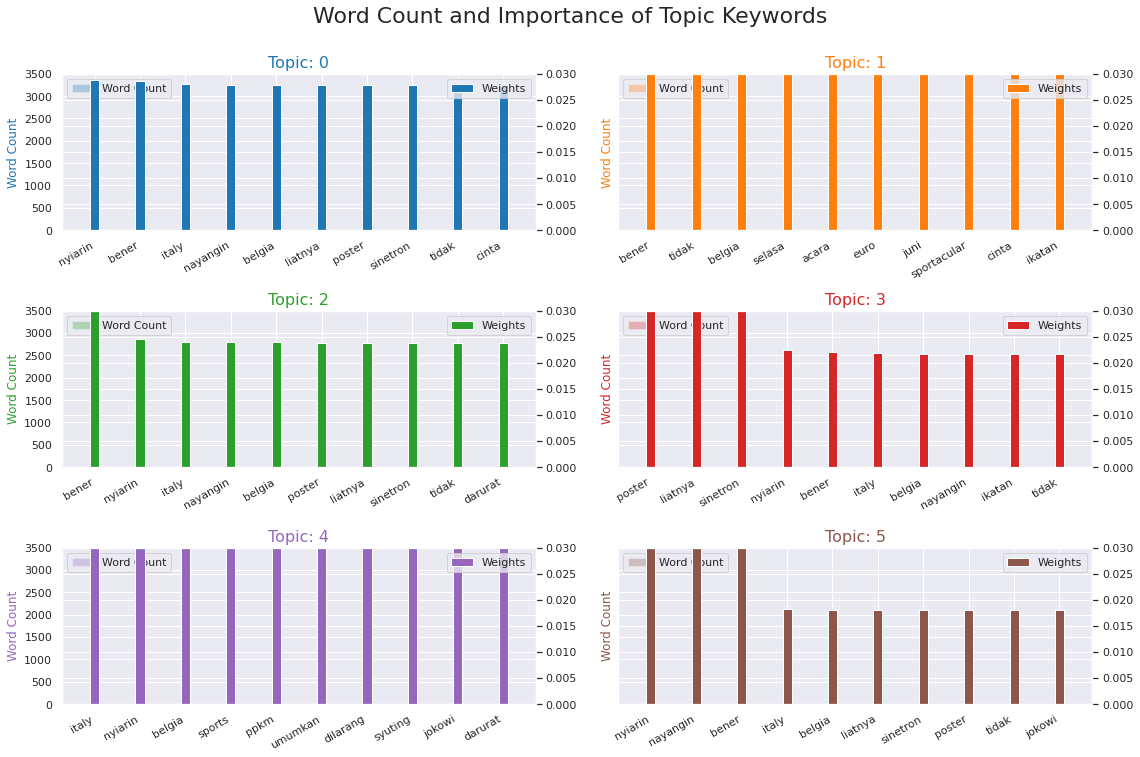

In [ ]:
from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in text_list for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()
